<a href="https://colab.research.google.com/github/xinliupitt/Projects/blob/master/Kaggle_House_Pricing_Teamwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Term Project Report - Group 15

# 1 Introduction (Author: Ziyue Han, Xin Liu)

Purchasing a house is a major milestone that tops many people's lifetime to-do lists, and possibly their lists of financial fears too. When people tend to buy a house, there are too many elements to consider, e.g., the neighborhood, and the area. However, among these elements, house price is probably the one which nearly everyone cares the most about. There is a project in the Kaggle targeting such a problem, i.e., House Prices: Advanced Regression Techniques. In this project, our team will make a prediction of the house prices based on lots of features and the knowledge learnt from Data Analysis course.

Two datasets are provided in the kaggle, including train.csv and test.csv. Both of these two datasets contain 79 explanatory variables describing almost every aspect of residence houses in Ames, Lowa. The goal of this project is to predict price of each house in test.csv through what is learnt from train.csv. 

This progress report mainly involves two parts. The first part is literature review for Kaggle. Kaggle is a competition platform for data analysis. Companies or researchers can upload data, problem descriptions, and desired metrics to the Kaggle and soliciting solutions from a wide range of data scientists. The contestants on Kaggle can download the data, analyze the data, then use the knowledge of machine learning, data mining, build the algorithm model, solve the problem to get the result, and finally submit the result. Kaggle problems, similar to house price prediction in this project, include Predict Future Sales and Recruit Restaurant Visitor Forecasting(i.e., predict number of visitors).

The second part is Descriptive Analytics. With the help of Python, especially Pandas, basic statistics about train.csv dataset is produced, such as the mean of each numeric features, standard deviation of numeric features. However, basic statistics are not enough to present these datasets. Therefore, each variables’ distributions are drawn to help us know better about the data. Then, bootstrap is used to resample the data. Furthermore, in order to select out more important features among 79 variables to train the model, correlation, association and interactions between features are computed. Following this, scatter plotting between SalePrice and other features reflect the existence of the outliers in GriLivArea and TotalBsmtSF features. Besides the outliers, null data should be taken into consideration. 

In the following few weeks, our team will process the data and select several suitable models to predict the prices of houses in test.csv.

Timeline:

Mar 26 – Apr 01: Data processing;

Apr 02 – Apr 08: Model training;

Apr 09 – Apr 15: Accuracy improvement. 


# 2 literature review (Author: Ruofei Lai, Xin Liu)

## a. Kaggle competition history

Kaggle are very popular among people instereted in data science. It is a competition platform about machine learning, data mining and data analysis. On kaggle, researchers could download dataset and take part in competitions, solve the problem and earn bonus. One can also post his problems on the website and wait for researchers to solve the problems [1] [2]. 

In the competition that we focused on, there are 4543 teams have submitted the result. The score is defined by Root Mean Squared Error, and the top 1 record is 0.000 which means that the accuracy of the prediction is almost 100%.

## b. A problem of this competition

Firstly, we should pay attention to feature selection and feature expansion. This dataset has more than 80 features, how to get useful information from such complex features is worth considering. We can use feature selection or feature expansion or even combine them into only several features. 

Secondly, cleaning up the raw data is also significant. Since the raw data may contain a lot of dirty information, miss some part of the data, or contain some data which can not be calculated, we should think about the following problems: How to fill the missing value, deal with the string data and drop the meaningless data.

The last thing is the choice of the model, which involves how to choose an appropriate model and how to select the parameters of the selected model.

## c. Existing methods in similar problems

### i) in academics

In previous works, some researchers have took part in a competition about Bike Sharing Demand [3]. 
Bike sharing system deploys several self-service bike rentals and returns station in the city. This competition provides historic data with feature such as weather, time, season, to predict the quantity of rent bike in specific situation. According to danache(2016), as data preprocessing, the competitor cleaned up the data, transformed part of data into the form he needed, dropped his undesired data. After data preprocessing, he tried SVM, decision tree and randomforest models. He used the training dataset to train the model, adjust the parameter of these model then used test dataset to test the accuracy of the result.

For improving the competitor's work, we can consider data clean, feature selection and feature expansion. For example, using some neural network models could get better accuracy than SVM, decision tree and randomforest. Moreover, the given data is limited, but the situation of bike rental station is more complex. Some other features are perferred to be presented in the dataset: the location of the station, whether there are some market or residential area around a station.

### ii) business

Another previous project, which focuses more on business, is about Mercedes-Benz Greener Manufacturing [4]. In this project, due to the extremely massive 300 feature, the competitors had to do feature selection to eliminate some redundancy data. They used XGboost and random forest model to get important features. After cleaning up data and feature selection, they used random forest to generate the model and do the prediction.


# 3 Descriptive Analytics (Author: Bohan Yang, Shiqi Wang, Ziyue Han)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler, OneHotEncoder
%matplotlib inline
from IPython.display import Image

In [0]:
# Loading data
path = '/Users/ziyuehan/Downloads/2018Spring/Data Analytics/Project/'
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')

In [0]:
print(train)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    1192

In [0]:
print(test)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
5     1466          60       RL         75.0    10000   Pave   NaN      IR1   
6     1467          20       RL          NaN     7980   Pave   NaN      IR1   
7     1468          60       RL         63.0     8402   Pave   NaN      IR1   
8     1469          20       RL         85.0    10176   Pave   NaN      Reg   
9     1470          20       RL         70.0     8400   Pave   NaN      Reg   
10    1471         120       RH         26.0     5858   Pave   NaN      IR1   
11    1472         160       RM         21.0     168

## 3.1 Basic Statistics

In [0]:
# Describing data
print('Describing data')
train.describe(include = 'all')

Describing data


Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utilities      ...           PoolArea  \
count     91     1460        1460      1460      ...        1460.000000   
unique     2        4           4         2      ...                NaN   
top     Grvl      Reg         Lvl    AllPub      ...                NaN   
freq      50      925        1311      1459      ...                NaN   
mean     NaN      NaN         NaN       NaN      ...           2.758904   
std      NaN      NaN         NaN       NaN      ...          40.177307   
min      NaN      NaN         NaN       NaN      ...           0.000000   
25%      NaN      NaN         NaN       NaN      ...           0.000000   
50%      NaN      NaN         NaN       NaN      ...           0.000000   
75%      NaN      NaN         NaN       NaN      ...           0.000000   
max      NaN      NaN         NaN       NaN      ...         738.000000   

       PoolQC  Fence MiscFeature       MiscVal       MoSold       YrSold  \
count       7    281          54   1460.000000  1460.000000  1460.000000   
unique      3      4           4           NaN          NaN          NaN   
top        Gd  MnPrv        Shed           NaN          NaN          NaN   
freq        3    157          49           NaN          NaN          NaN   
mean      NaN    NaN         NaN     43.489041     6.321918  2007.815753   
std       NaN    NaN         NaN    496.123024     2.703626     1.328095   
min       NaN    NaN         NaN      0.000000     1.000000  2006.000000   
25%       NaN    NaN         NaN      0.000000     5.000000  2007.000000   
50%       NaN    NaN         NaN      0.000000     6.000000  2008.000000   
75%       NaN    NaN         NaN      0.000000     8.000000  2009.000000   
max       NaN    NaN         NaN  15500.000000    12.000000  2010.000000   

        SaleType  SaleCondition      SalePrice  
count       1460           1460    1460.000000  
unique         9              6            NaN  
top           WD         Normal            NaN  
freq        1267           1198            NaN  
mean         NaN            NaN  180921.195890  
std          NaN            NaN   79442.502883  
min          NaN            NaN   34900.000000  
25%          NaN            NaN  129975.000000  
50%          NaN            NaN  163000.000000  
75%          NaN            NaN  214000.000000  
max          NaN            NaN  755000.000000  

[11 rows x 81 columns]

In [0]:
print('info')
train.info()

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 

In [0]:
print('mode')
train.mode()

mode


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1        20.0       RL         60.0   7200.0   Pave  Grvl      Reg   
1        2         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
2        3         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
3        4         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
4        5         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
5        6         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
6        7         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
7        8         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
8        9         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
9       10         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
10      11         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
11      12         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
12      13         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
13      14         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
14      15         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
15      16         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
16      17         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
17      18         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
18      19         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
19      20         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
20      21         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
21      22         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
22      23         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
23      24         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
24      25         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
25      26         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
26      27         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
27      28         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
28      29         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
29      30         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1430  1431         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
1431  1432         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
1432  1433         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
1433  1434         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
1434  1435         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
1435  1436         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
1436  1437         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
1437  1438         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
1438  1439         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
1439  1440         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
1440  1441         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
1441  1442         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
1442  1443         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
1443  1444         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
1444  1445         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
1445  1446         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
1446  1447         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
1447  1448         NaN      NaN          NaN      NaN    NaN   NaN      NaN   
1448  1449         NaN      NaN          NaN      NaN    N

In [0]:
print('mean')
train.mean()

mean


Id                  730.500000
MSSubClass           56.897260
LotFrontage          70.049958
LotArea           10516.828082
OverallQual           6.099315
OverallCond           5.575342
YearBuilt          1971.267808
YearRemodAdd       1984.865753
MasVnrArea          103.685262
BsmtFinSF1          443.639726
BsmtFinSF2           46.549315
BsmtUnfSF           567.240411
TotalBsmtSF        1057.429452
1stFlrSF           1162.626712
2ndFlrSF            346.992466
LowQualFinSF          5.844521
GrLivArea          1515.463699
BsmtFullBath          0.425342
BsmtHalfBath          0.057534
FullBath              1.565068
HalfBath              0.382877
BedroomAbvGr          2.866438
KitchenAbvGr          1.046575
TotRmsAbvGrd          6.517808
Fireplaces            0.613014
GarageYrBlt        1978.506164
GarageCars            1.767123
GarageArea          472.980137
WoodDeckSF           94.244521
OpenPorchSF          46.660274
EnclosedPorch        21.954110
3SsnPorch             3.409589
ScreenPo

In [0]:
print('median')
train.median()

median


Id                  730.5
MSSubClass           50.0
LotFrontage          69.0
LotArea            9478.5
OverallQual           6.0
OverallCond           5.0
YearBuilt          1973.0
YearRemodAdd       1994.0
MasVnrArea            0.0
BsmtFinSF1          383.5
BsmtFinSF2            0.0
BsmtUnfSF           477.5
TotalBsmtSF         991.5
1stFlrSF           1087.0
2ndFlrSF              0.0
LowQualFinSF          0.0
GrLivArea          1464.0
BsmtFullBath          0.0
BsmtHalfBath          0.0
FullBath              2.0
HalfBath              0.0
BedroomAbvGr          3.0
KitchenAbvGr          1.0
TotRmsAbvGrd          6.0
Fireplaces            1.0
GarageYrBlt        1980.0
GarageCars            2.0
GarageArea          480.0
WoodDeckSF            0.0
OpenPorchSF          25.0
EnclosedPorch         0.0
3SsnPorch             0.0
ScreenPorch           0.0
PoolArea              0.0
MiscVal               0.0
MoSold                6.0
YrSold             2008.0
SalePrice        163000.0
dtype: float

In [0]:
print('range')
train.describe().loc[['min','max']]

range


Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
min     1.0        20.0         21.0    1300.0          1.0          1.0   
max  1460.0       190.0        313.0  215245.0         10.0          9.0   

     YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1    ...      WoodDeckSF  \
min     1872.0        1950.0         0.0         0.0    ...             0.0   
max     2010.0        2010.0      1600.0      5644.0    ...           857.0   

     OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
min          0.0            0.0        0.0          0.0       0.0      0.0   
max        547.0          552.0      508.0        480.0     738.0  15500.0   

     MoSold  YrSold  SalePrice  
min     1.0  2006.0    34900.0  
max    12.0  2010.0   755000.0  

[2 rows x 38 columns]

In [0]:
print('variance')
train.var()

variance


Id               1.777550e+05
MSSubClass       1.789338e+03
LotFrontage      5.897492e+02
LotArea          9.962565e+07
OverallQual      1.912679e+00
OverallCond      1.238322e+00
YearBuilt        9.122154e+02
YearRemodAdd     4.262328e+02
MasVnrArea       3.278497e+04
BsmtFinSF1       2.080255e+05
BsmtFinSF2       2.602391e+04
BsmtUnfSF        1.952464e+05
TotalBsmtSF      1.924624e+05
1stFlrSF         1.494501e+05
2ndFlrSF         1.905571e+05
LowQualFinSF     2.364204e+03
GrLivArea        2.761296e+05
BsmtFullBath     2.692682e-01
BsmtHalfBath     5.700283e-02
FullBath         3.035082e-01
HalfBath         2.528937e-01
BedroomAbvGr     6.654938e-01
KitchenAbvGr     4.854892e-02
TotRmsAbvGrd     2.641903e+00
Fireplaces       4.155947e-01
GarageYrBlt      6.095825e+02
GarageCars       5.584797e-01
GarageArea       4.571251e+04
WoodDeckSF       1.570981e+04
OpenPorchSF      4.389861e+03
EnclosedPorch    3.735550e+03
3SsnPorch        8.595059e+02
ScreenPorch      3.108889e+03
PoolArea  

In [0]:
print('standard deviation')
train.std()

standard deviation


Id                 421.610009
MSSubClass          42.300571
LotFrontage         24.284752
LotArea           9981.264932
OverallQual          1.382997
OverallCond          1.112799
YearBuilt           30.202904
YearRemodAdd        20.645407
MasVnrArea         181.066207
BsmtFinSF1         456.098091
BsmtFinSF2         161.319273
BsmtUnfSF          441.866955
TotalBsmtSF        438.705324
1stFlrSF           386.587738
2ndFlrSF           436.528436
LowQualFinSF        48.623081
GrLivArea          525.480383
BsmtFullBath         0.518911
BsmtHalfBath         0.238753
FullBath             0.550916
HalfBath             0.502885
BedroomAbvGr         0.815778
KitchenAbvGr         0.220338
TotRmsAbvGrd         1.625393
Fireplaces           0.644666
GarageYrBlt         24.689725
GarageCars           0.747315
GarageArea         213.804841
WoodDeckSF         125.338794
OpenPorchSF         66.256028
EnclosedPorch       61.119149
3SsnPorch           29.317331
ScreenPorch         55.757415
PoolArea  

In [0]:
print('average absolute deviation (or mean absolute deviation)')
train.mad()

average absolute deviation (or mean absolute deviation)


Id                 365.000000
MSSubClass          31.282745
LotFrontage         16.761902
LotArea           3758.813815
OverallQual          1.098048
OverallCond          0.889022
YearBuilt           25.067223
YearRemodAdd        18.623153
MasVnrArea         129.781835
BsmtFinSF1         367.369673
BsmtFinSF2          82.535014
BsmtUnfSF          353.281616
TotalBsmtSF        321.284373
1stFlrSF           300.576309
2ndFlrSF           396.477549
LowQualFinSF        11.480880
GrLivArea          397.324938
BsmtFullBath         0.498758
BsmtHalfBath         0.108606
FullBath             0.522439
HalfBath             0.478858
BedroomAbvGr         0.576309
KitchenAbvGr         0.090246
TotRmsAbvGrd         1.279595
Fireplaces           0.579424
GarageYrBlt         20.913178
GarageCars           0.583843
GarageArea         160.019065
WoodDeckSF         101.995795
OpenPorchSF         47.678078
EnclosedPorch       37.659525
3SsnPorch            6.707082
ScreenPorch         27.728670
PoolArea  

## 3.2 Variables’ distributions

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46027076, 10.76769112, 11.07511148, 11.38253184, 11.6899522 ,
        11.99737256, 12.30479292, 12.61221328, 12.91963363, 13.22705399,
        13.53447435]),
 <a list of 10 Patch objects>)

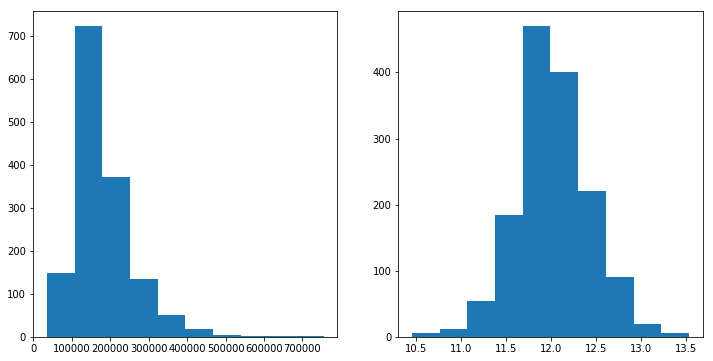

In [0]:
# SalePrice's distribution
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(12)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.hist(train.SalePrice)
ax2.hist(np.log1p(train.SalePrice))

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


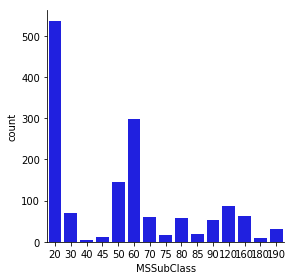

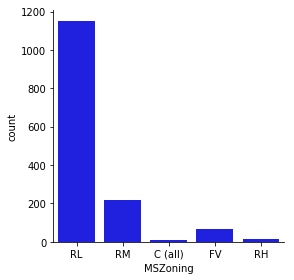

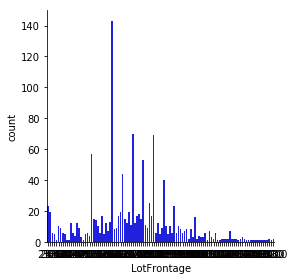

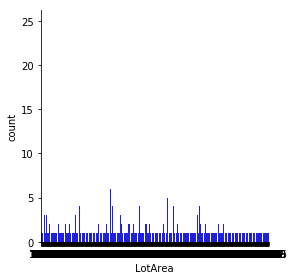

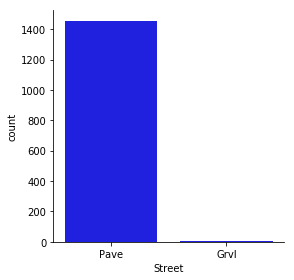

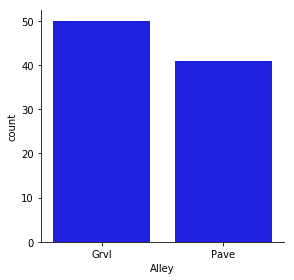

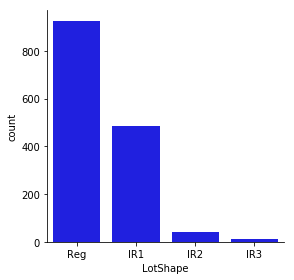

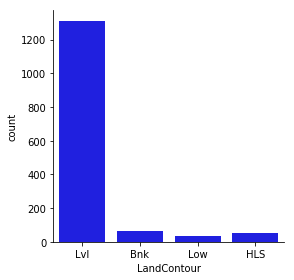

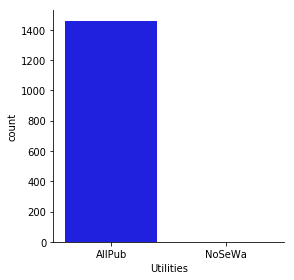

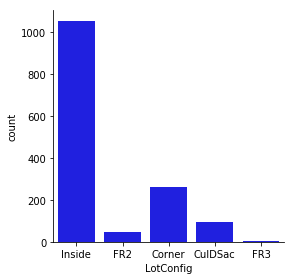

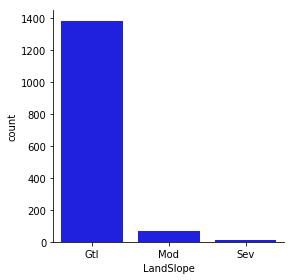

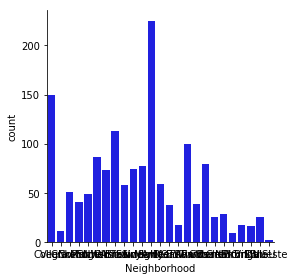

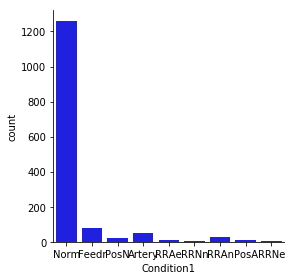

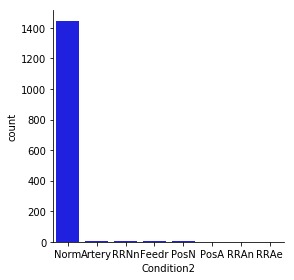

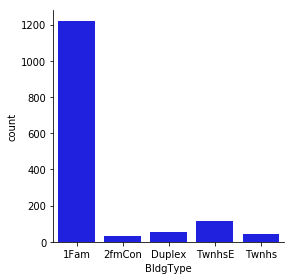

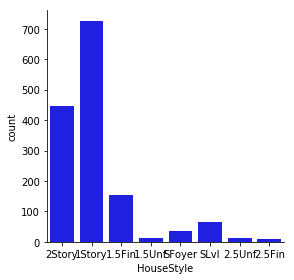

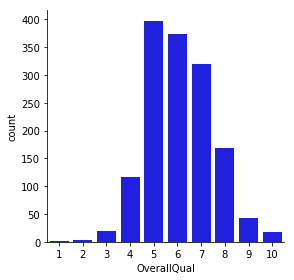

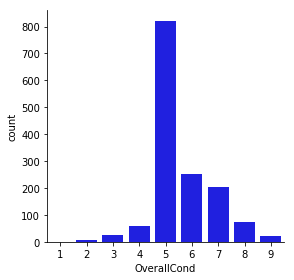

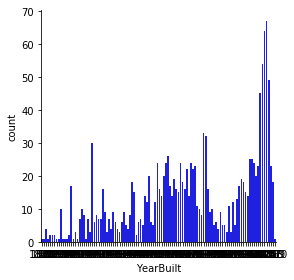

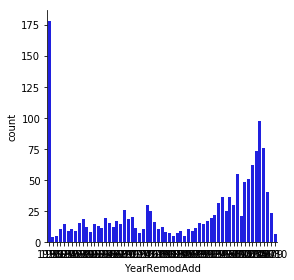

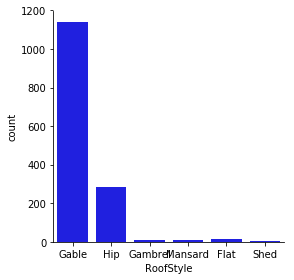

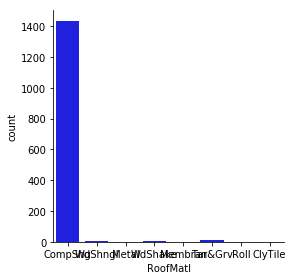

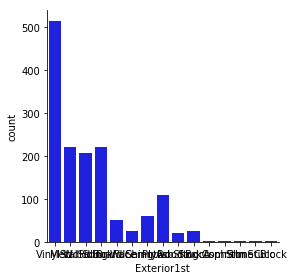

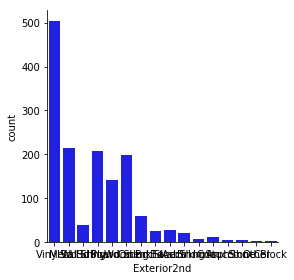

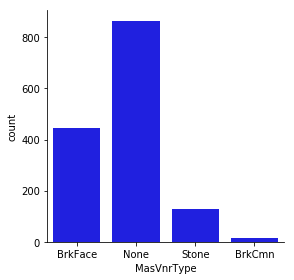

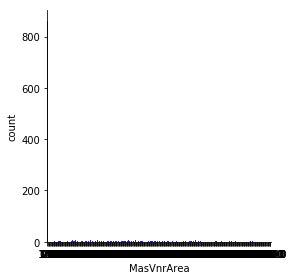

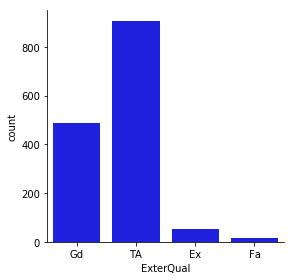

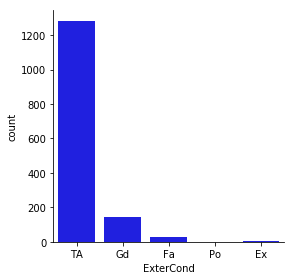

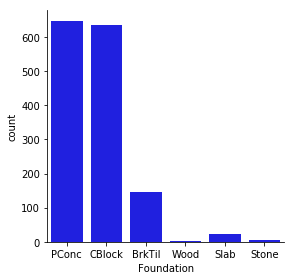

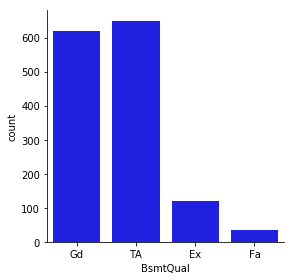

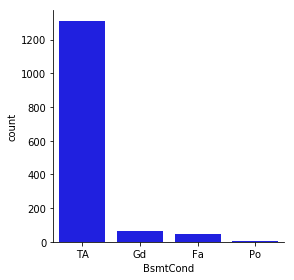

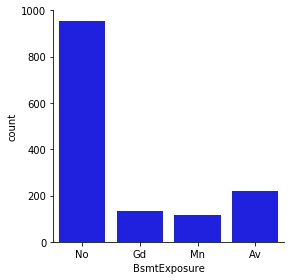

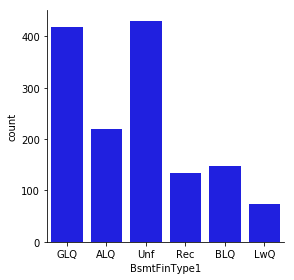

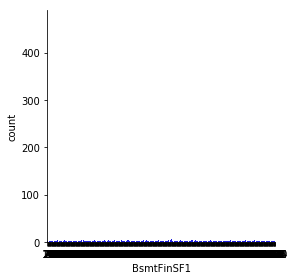

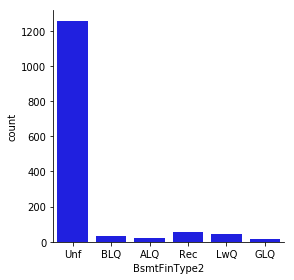

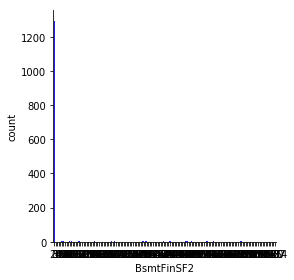

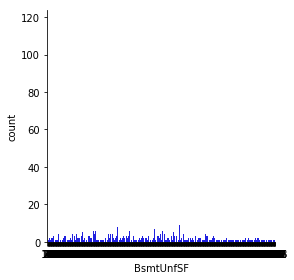

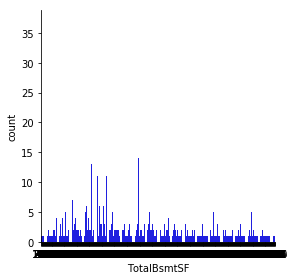

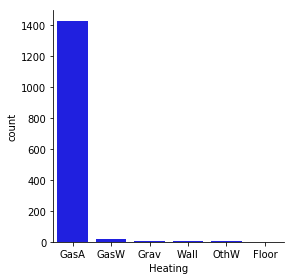

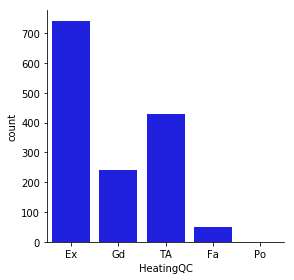

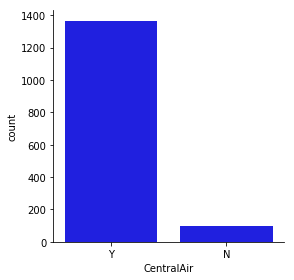

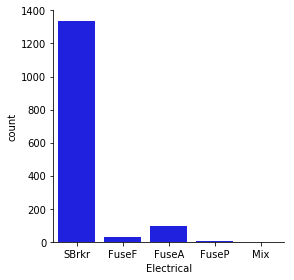

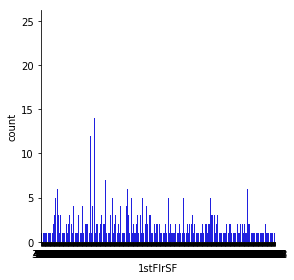

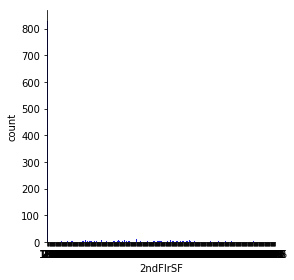

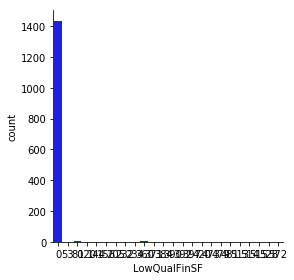

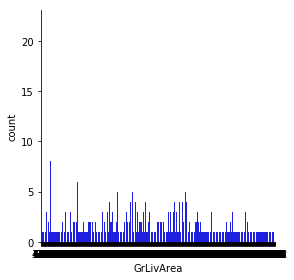

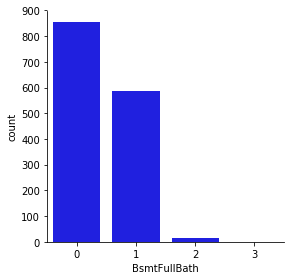

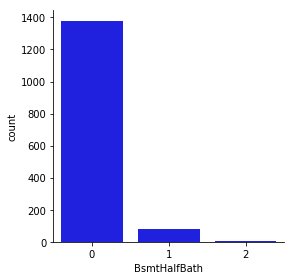

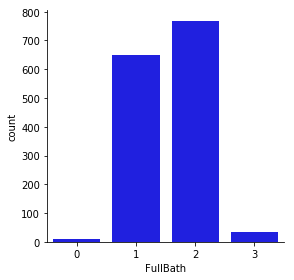

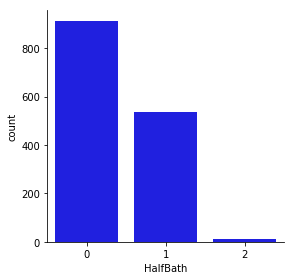

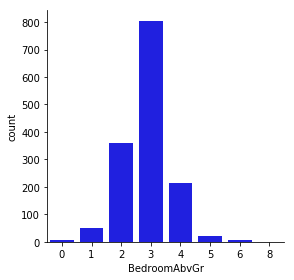

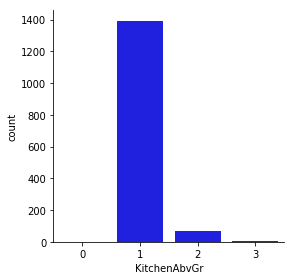

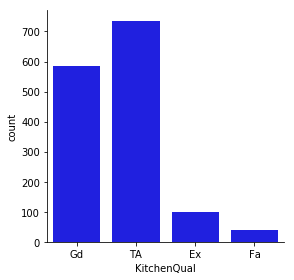

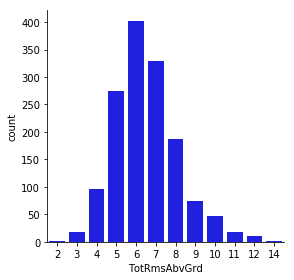

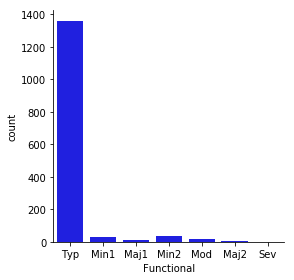

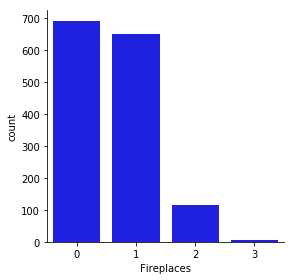

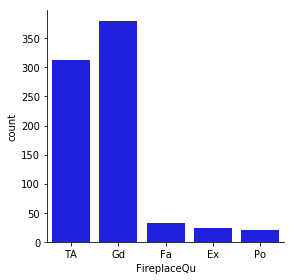

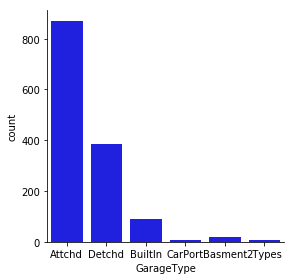

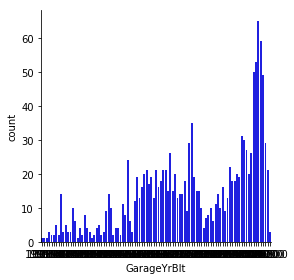

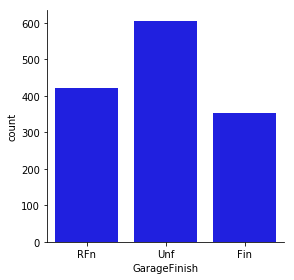

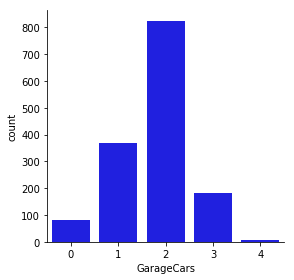

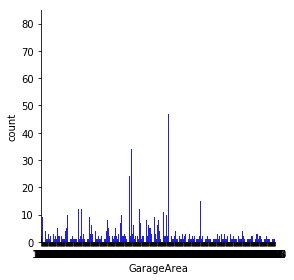

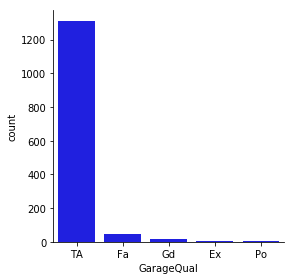

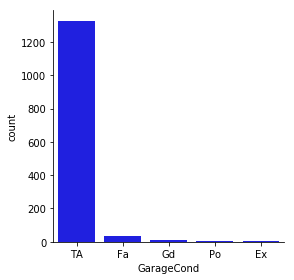

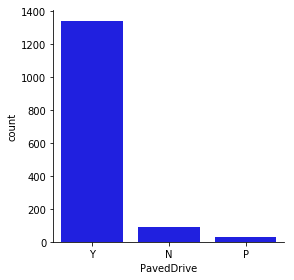

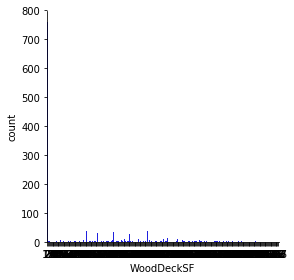

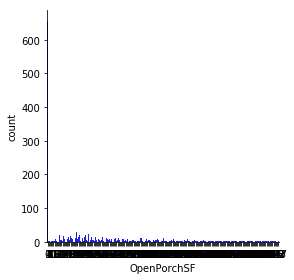

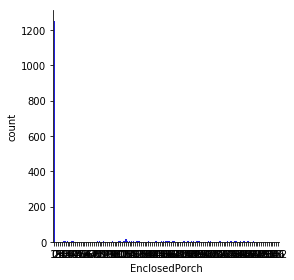

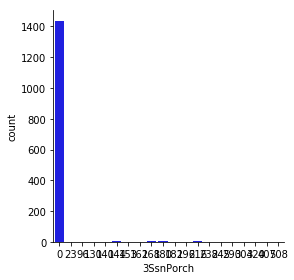

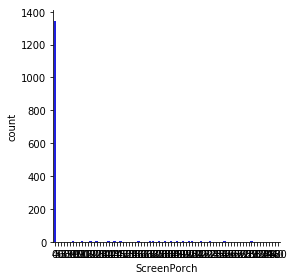

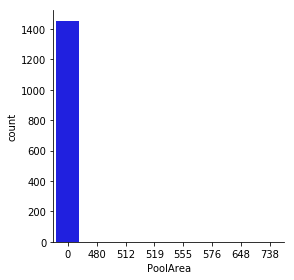

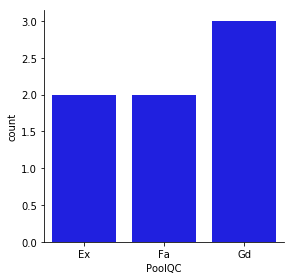

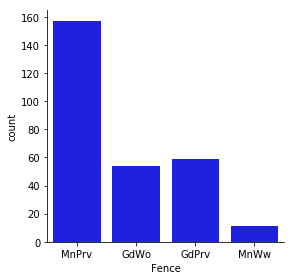

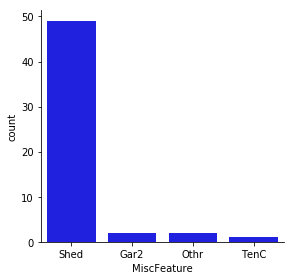

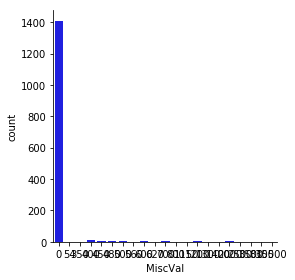

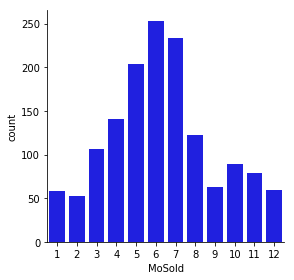

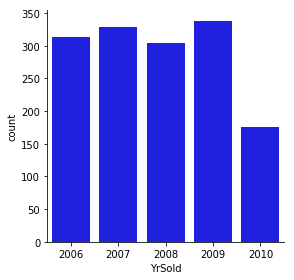

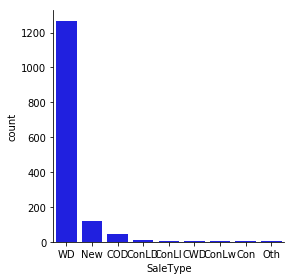

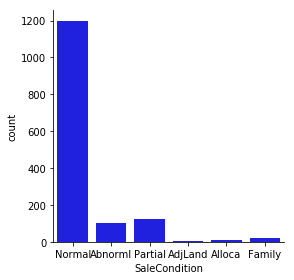

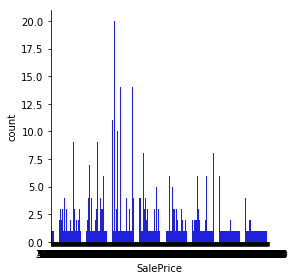

In [0]:
# Distribution
for i in train.columns:
    if(i != 'Id'):
        sns.factorplot(i, data = train, kind = 'count', color = 'blue')

## 3.3 Bootstrapping

In [0]:
def bootstrap_resample(X, n=None):
    """ Bootstrap resample an array_like
    Parameters
    ----------
    X : array_like
      data to resample
    n : int, optional
      length of resampled array, equal to len(X) if n==None
    Results
    -------
    returns X_resamples
    """
    if isinstance(X, pd.Series):
        X = X.copy()
        X.index = range(len(X.index))
    if n == None:
        n = len(X)
        
    resample_i = np.floor(np.random.rand(n)*len(X)).astype(int)
    X_resample = np.array(X[resample_i])  # TODO: write a test demonstrating why array() is important
    return X_resample

In [0]:
train_resampled = pd.DataFrame(index=train.index, columns=train.columns)

In [0]:
for col in train.columns:
    train_resampled[col] = bootstrap_resample(train[col])

In [0]:
print(train_resampled)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        3          60       RL         70.0     6951   Pave   NaN      IR1   
1       50          30       RM         75.0     8400   Pave   NaN      IR1   
2     1356          20       RL         84.0     9000   Pave   NaN      Reg   
3      782          20       RL          NaN     4282   Pave   NaN      Reg   
4      743          20       RL         87.0     7728   Pave  Grvl      IR2   
5     1312          90       RL         68.0    11216   Pave   NaN      IR1   
6     1170          20       RL          NaN    10208   Pave   NaN      Reg   
7      502          70       RL         80.0    10832   Pave   NaN      Reg   
8      225          40       RL         60.0     8544   Pave   NaN      IR2   
9     1340          20       RL         51.0    10192   Pave   NaN      Reg   
10     921         190       RM          NaN     2280   Pave   NaN      Reg   
11     705          30       RL          NaN     993

In [0]:
print(train)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    1192

## 3.4 Correlation, association, and interactions

### (1) Correlation

In [0]:
print('Correlation matrix using pearson method')
train.corr(method='pearson')

Correlation matrix using pearson method


Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.392075  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.457181  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.080177  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.038469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.402797  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.198769  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.053532  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.263170  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.006069 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.352096  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.266639  0.271364     0.396765   
GarageYrBlt    0.000072    0.085072     0.070250 -0.024947     0.547766   
GarageCars     0.016570   -0.040110     0.285691  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.344997  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088521  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.151972  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010700 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.070029  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041383  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.206167  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.003368  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.011200  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.007450 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.351799  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage      -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea          -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.411876    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.128101   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.315707    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179618    0.128451   
MasVnrArea       -0.128101   0.315707      0.179618    1.000000    0.264736   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.264736    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072319   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114442   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.363936    0

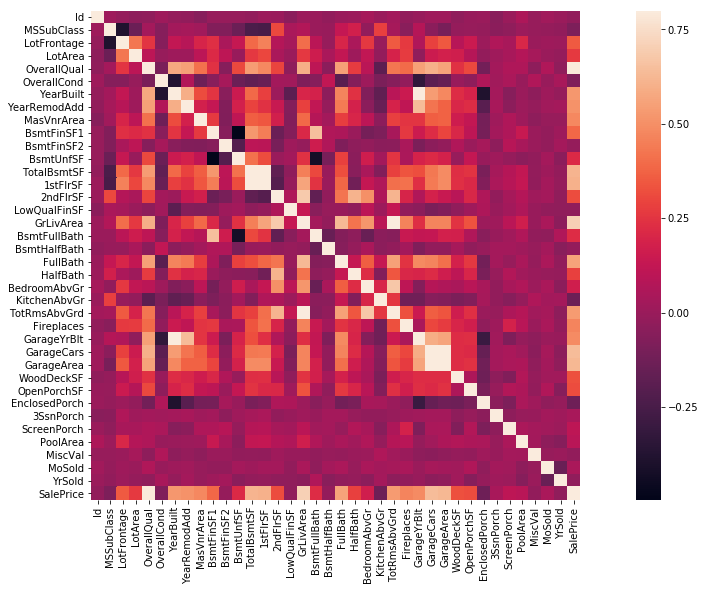

In [0]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

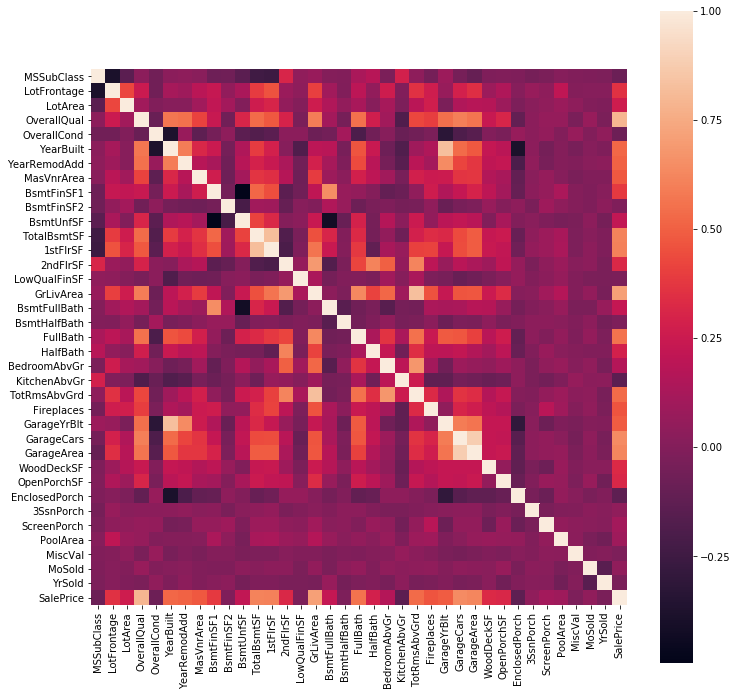

In [0]:
# numerical_features
numerical_features = train.select_dtypes(include = ['float64', 'int64'])
corrmat = numerical_features.iloc[:, 1:].corr()
plt.figure(figsize = (12, 12))
sns.heatmap(corrmat, vmax=1, square=True);

In [0]:
cor_dict = corrmat['SalePrice'].to_dict()
del cor_dict['SalePrice']
for key, value in sorted(cor_dict.items(), key = lambda x: x[1], reverse = True):
    print(key + "\t", value)

OverallQual	 0.7909816005838047
GrLivArea	 0.7086244776126511
GarageCars	 0.640409197258349
GarageArea	 0.6234314389183598
TotalBsmtSF	 0.6135805515591944
1stFlrSF	 0.6058521846919166
FullBath	 0.5606637627484452
TotRmsAbvGrd	 0.5337231555820238
YearBuilt	 0.5228973328794967
YearRemodAdd	 0.5071009671113867
GarageYrBlt	 0.48636167748786213
MasVnrArea	 0.4774930470957107
Fireplaces	 0.4669288367515242
BsmtFinSF1	 0.38641980624215627
LotFrontage	 0.35179909657067854
WoodDeckSF	 0.32441344456813076
2ndFlrSF	 0.31933380283206614
OpenPorchSF	 0.31585622711605577
HalfBath	 0.2841076755947784
LotArea	 0.2638433538714063
BsmtFullBath	 0.22712223313149718
BsmtUnfSF	 0.214479105546969
BedroomAbvGr	 0.1682131543007415
ScreenPorch	 0.11144657114291048
PoolArea	 0.09240354949187278
MoSold	 0.04643224522381936
3SsnPorch	 0.04458366533574792
BsmtFinSF2	 -0.011378121450215216
BsmtHalfBath	 -0.016844154297359294
MiscVal	 -0.02118957964030379
LowQualFinSF	 -0.02560613000068015
YrSold	 -0.028922585168730

### Based on above graph, we decide the features which correlation to SalePrice is higher than 0.5 will be left, other features will be droped in order to avoid overfitting caused by too many features.
### The left numeric features are:
* OverallQual 0.790981600584 
* GrLivArea 0.708624477613 
* GarageCars 0.640409197258 
* GarageArea 0.623431438918 
* TotalBsmtSF 0.613580551559 
* 1stFlrSF 0.605852184692 
* FullBath 0.560663762748 
* TotRmsAbvGrd 0.533723155582 
* YearBuilt 0.522897332879 
* YearRemodAdd 0.507100967111 

In [0]:
# categorical features
print(train.select_dtypes(include=['object']).columns.values)

['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' 'KitchenQual'
 'Functional' 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageQual'
 'GarageCond' 'PavedDrive' 'PoolQC' 'Fence' 'MiscFeature' 'SaleType'
 'SaleCondition']


1460


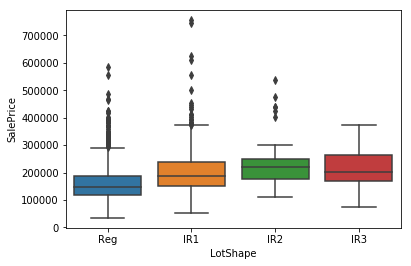

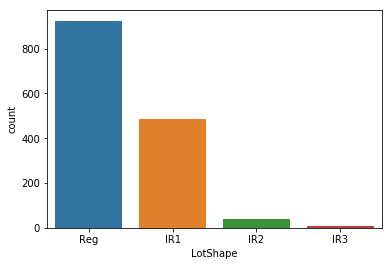

In [0]:
print(train['LotShape'].count())
sns.boxplot(x = 'LotShape', y = 'SalePrice',  data = train)
plt.figure()
sns.countplot(x = 'LotShape', data = train)

91


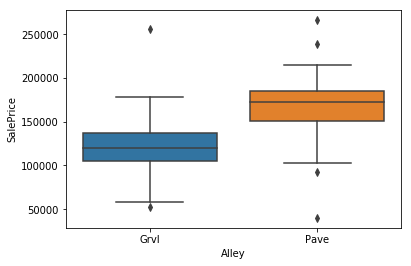

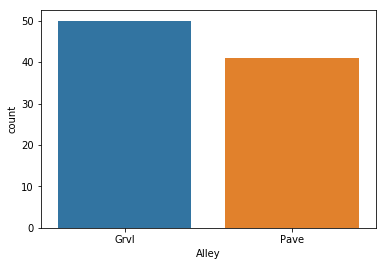

In [0]:
print(train['Alley'].count())
sns.boxplot(x = 'Alley', y = 'SalePrice',  data = train)
plt.figure()
sns.countplot(x = 'Alley', data = train)

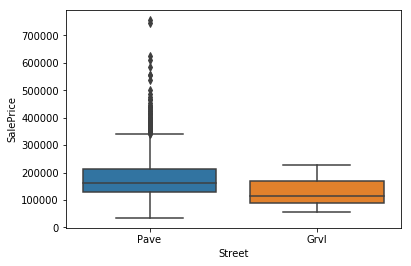

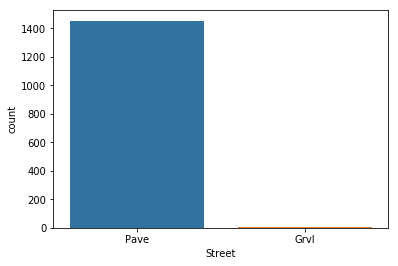

In [0]:
sns.boxplot(x = 'Street', y = 'SalePrice',  data = train)
plt.figure()
sns.countplot(x = 'Street', data = train)

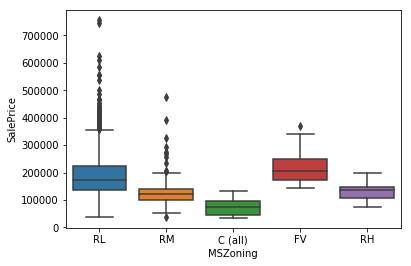

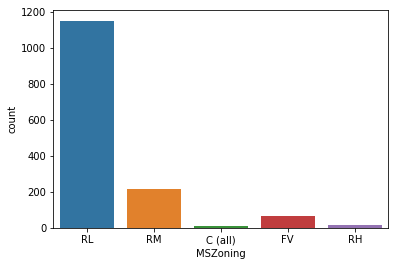

In [0]:
sns.boxplot(x = 'MSZoning', y = 'SalePrice',  data = train)
plt.figure()
sns.countplot(x = 'MSZoning', data = train)

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


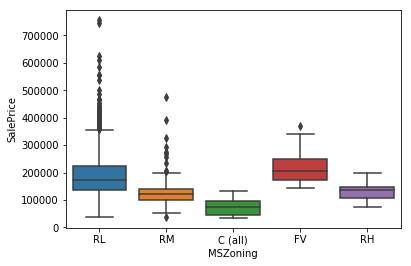

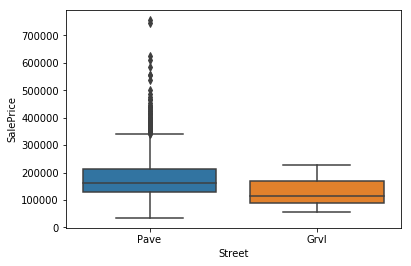

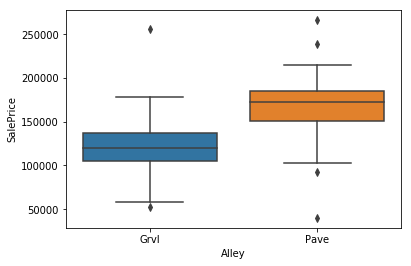

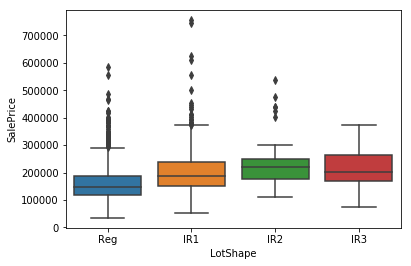

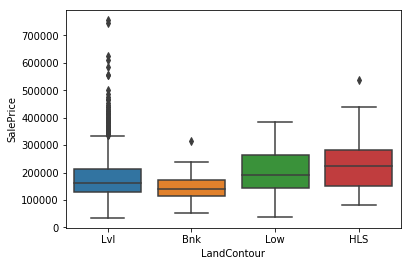

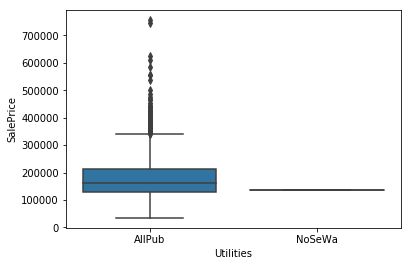

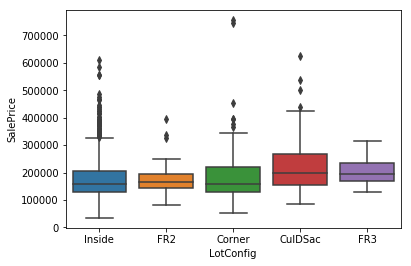

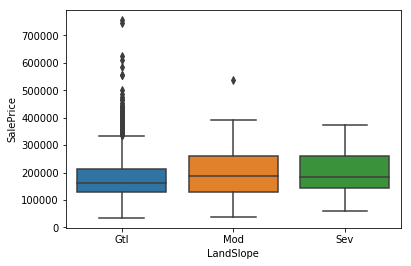

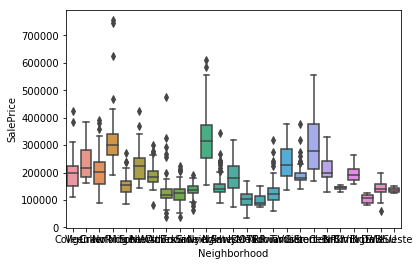

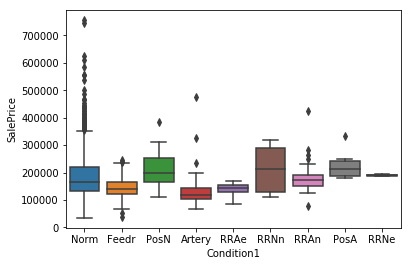

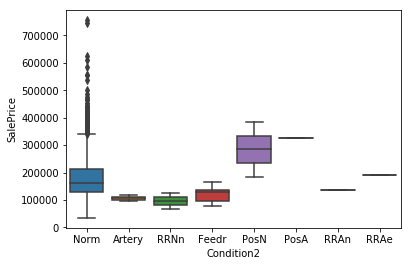

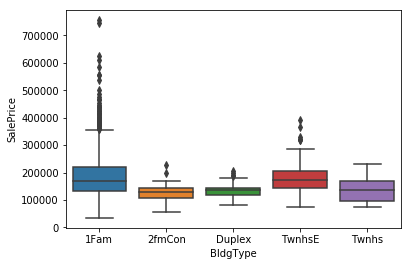

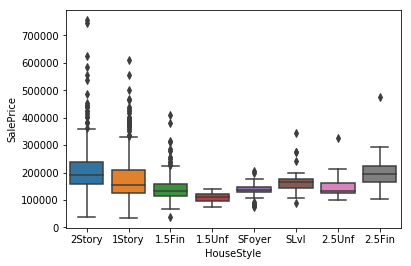

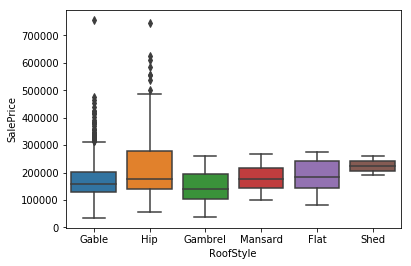

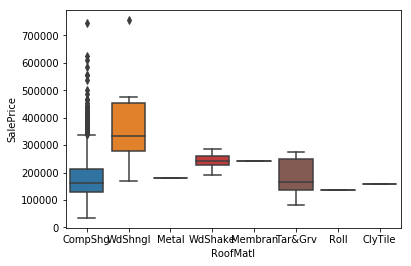

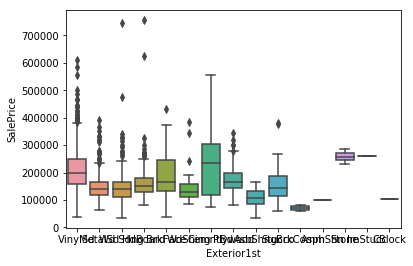

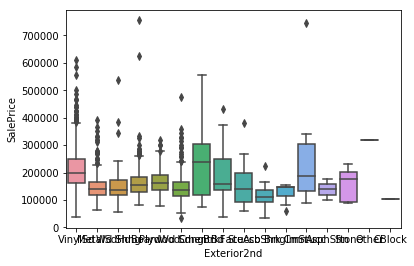

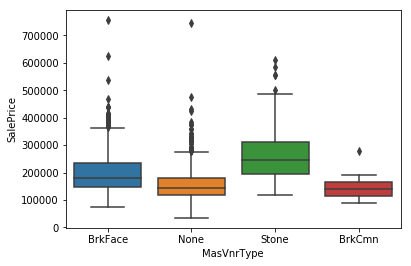

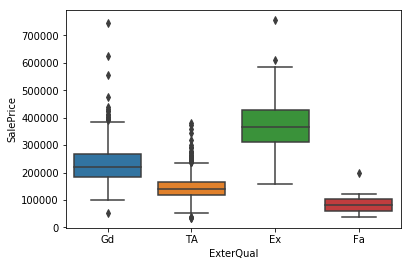

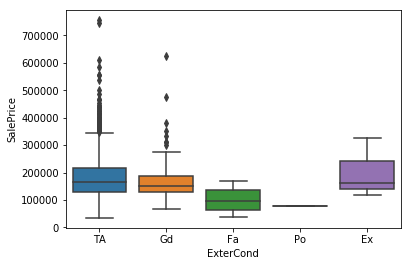

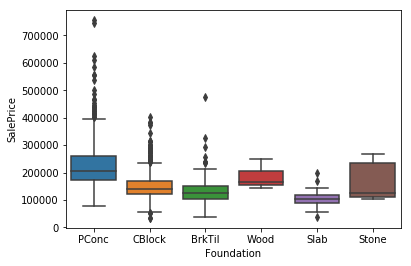

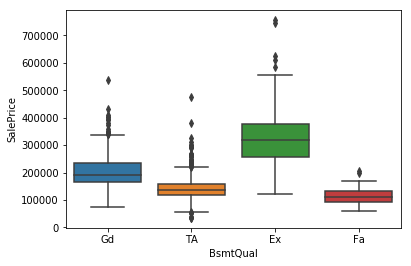

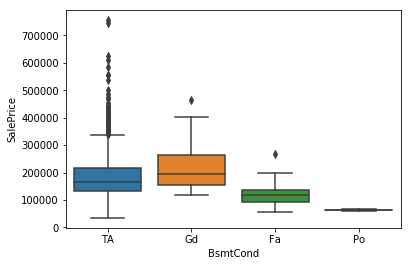

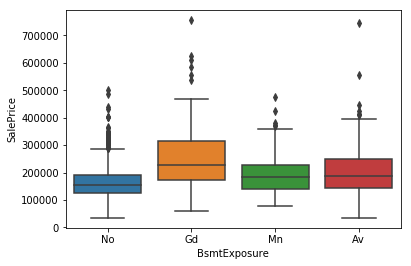

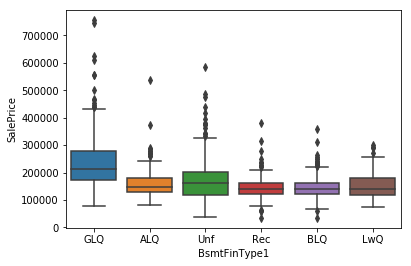

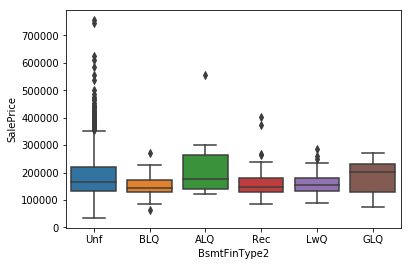

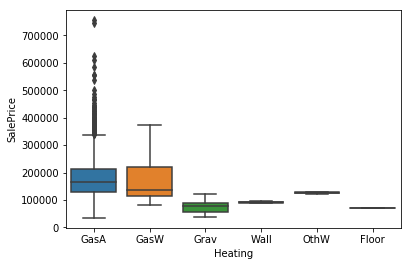

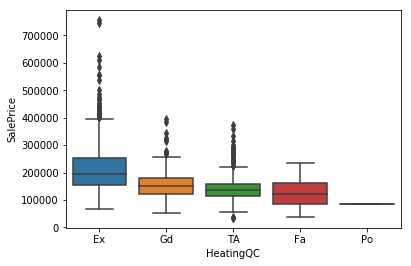

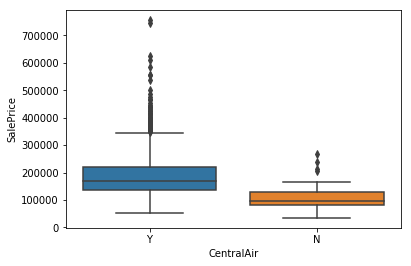

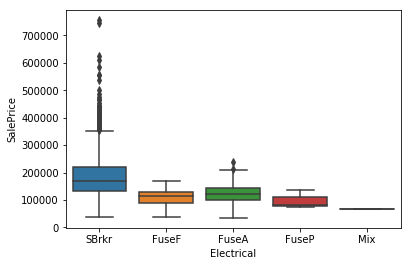

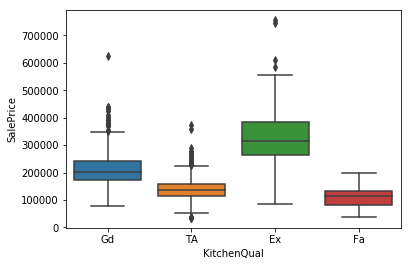

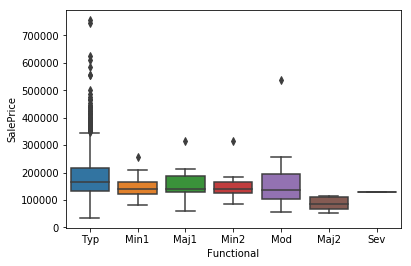

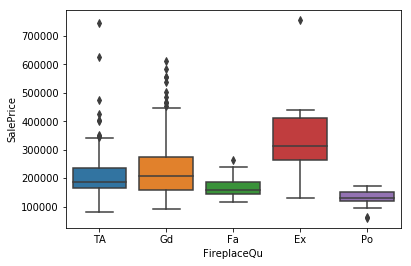

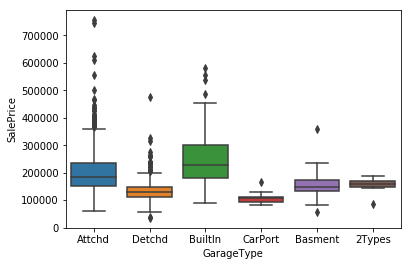

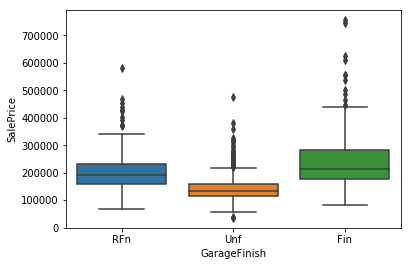

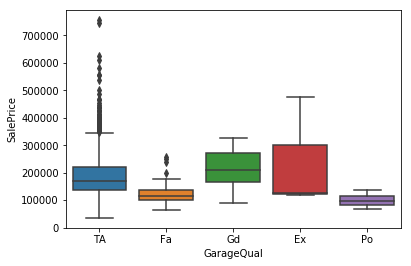

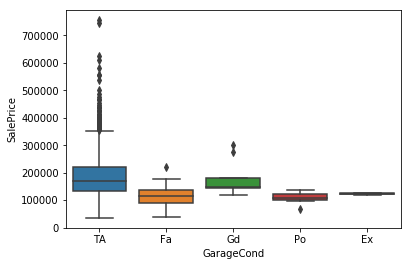

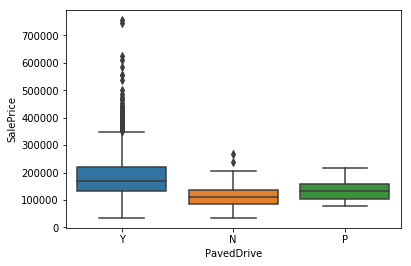

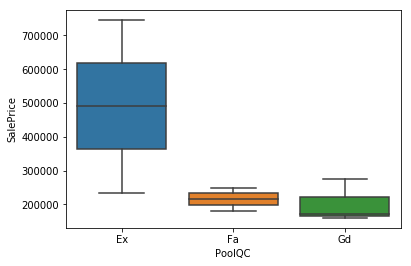

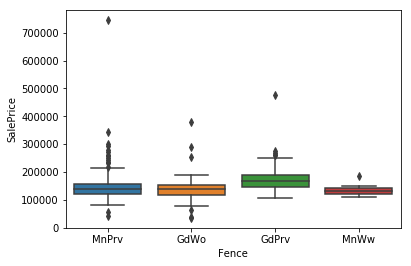

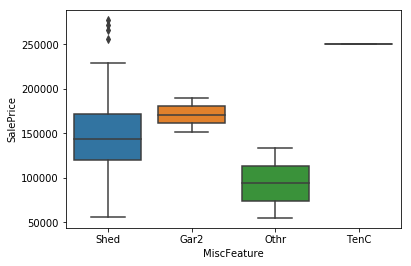

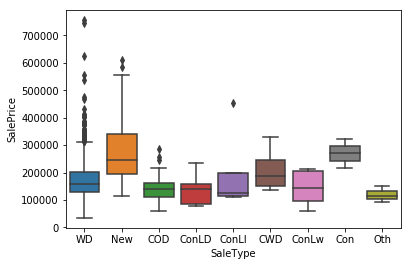

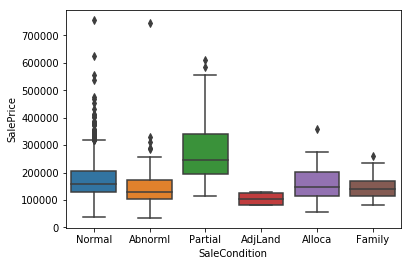

In [0]:
for e in train.select_dtypes(include=['object']).columns.values:
    sns.boxplot(x = e, y = 'SalePrice',  data = train)
    plt.figure()
#xt = plt.xticks(rotation=45)

### (2) association

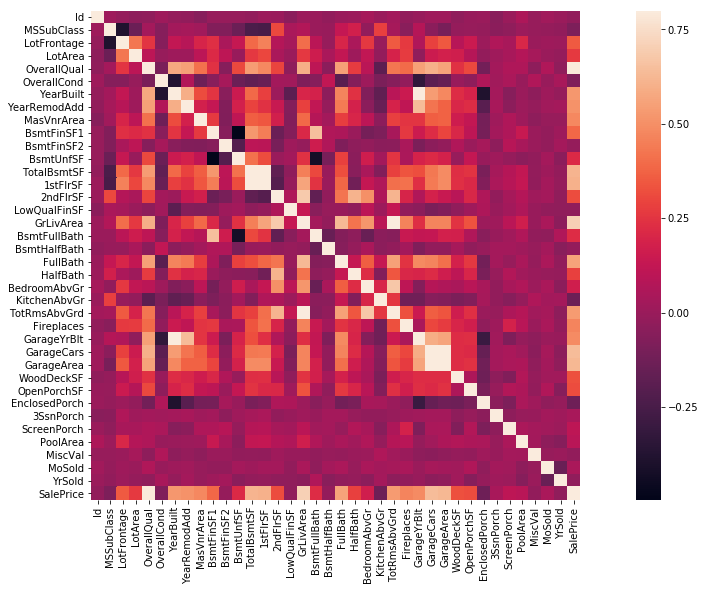

In [0]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


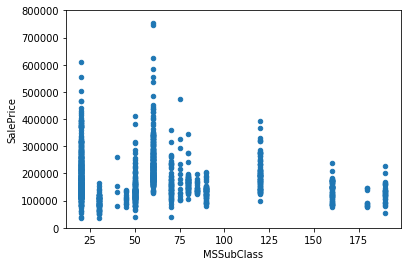

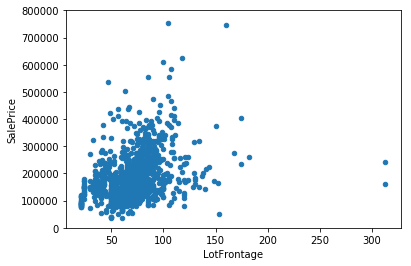

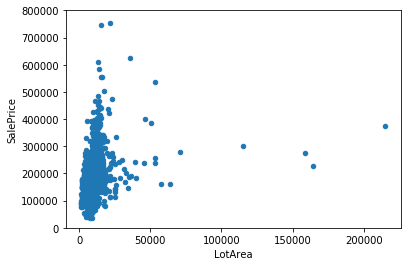

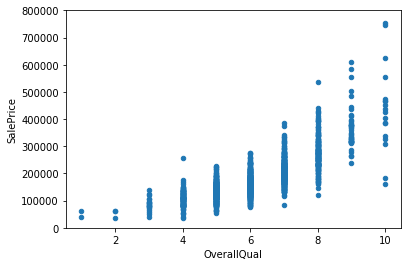

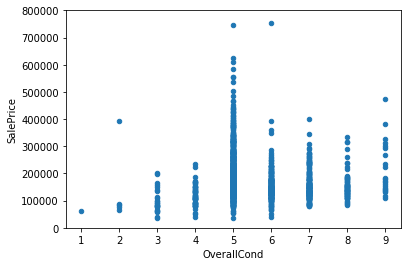

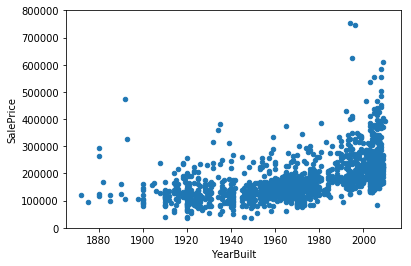

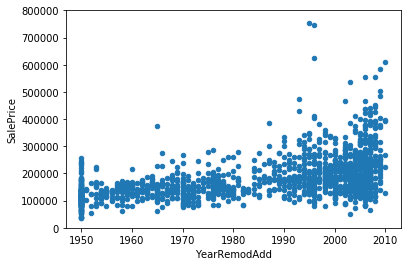

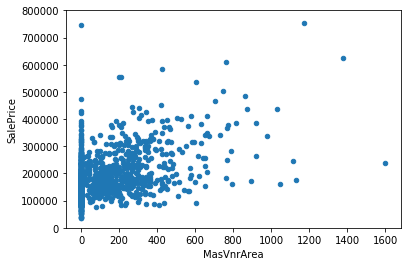

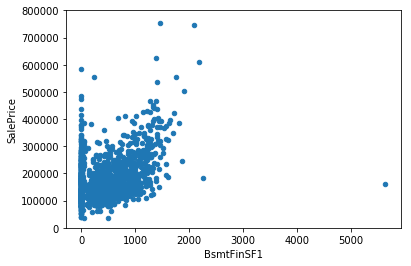

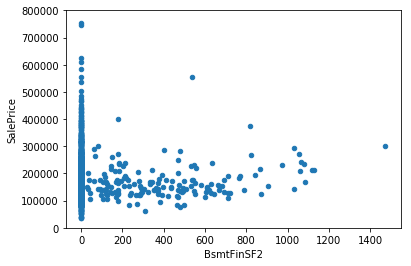

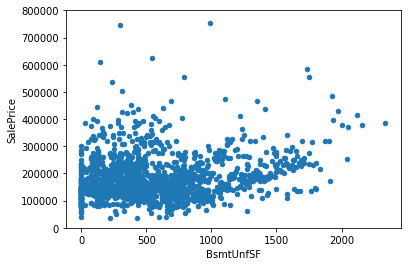

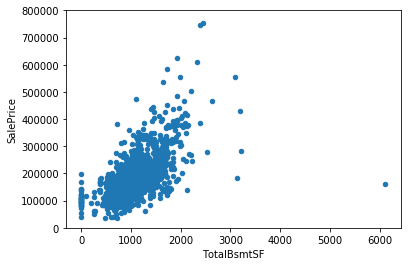

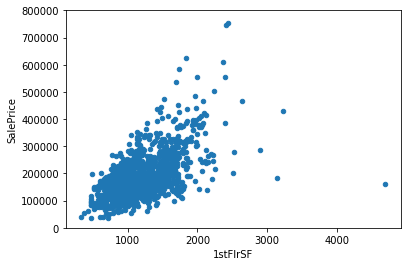

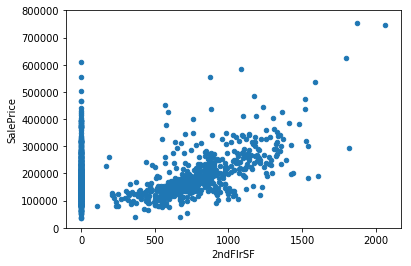

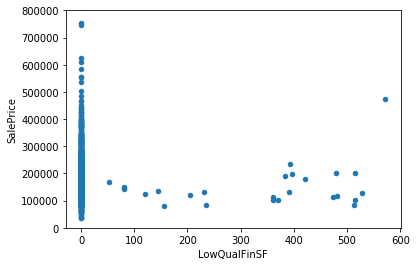

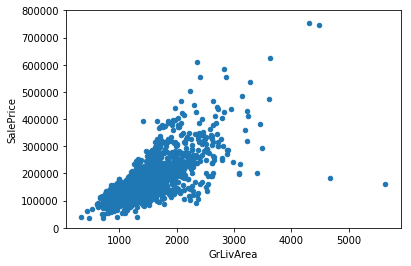

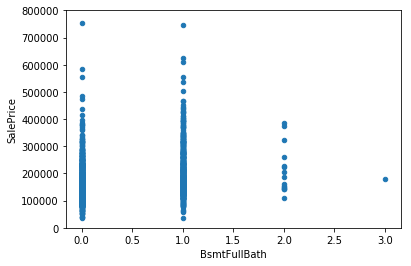

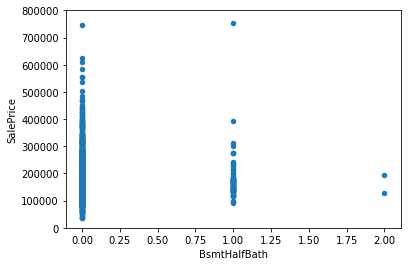

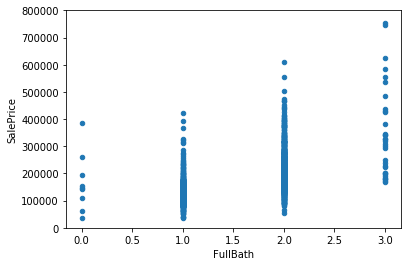

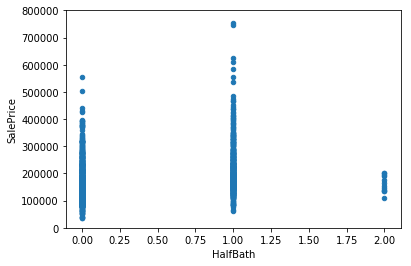

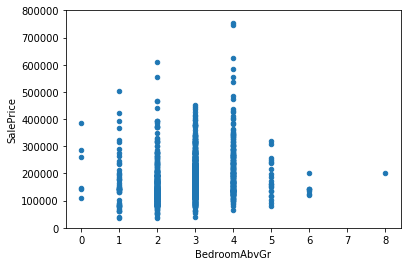

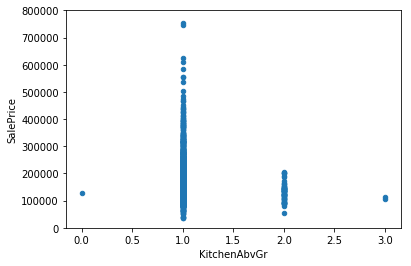

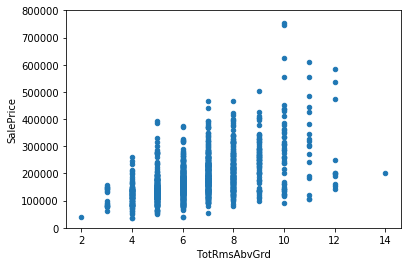

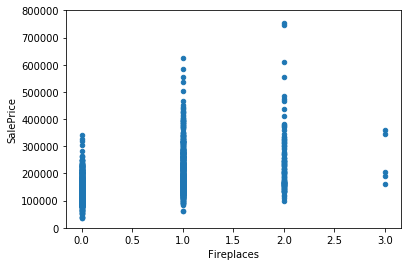

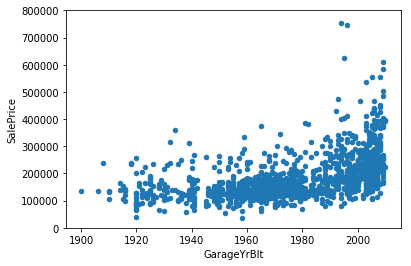

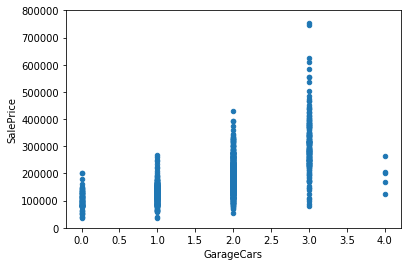

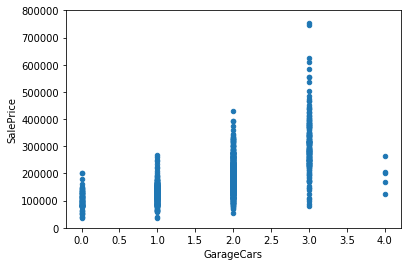

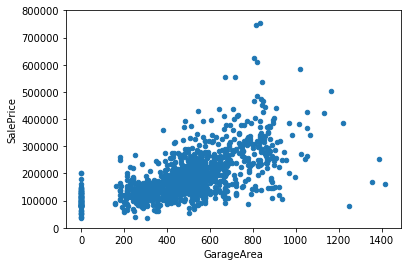

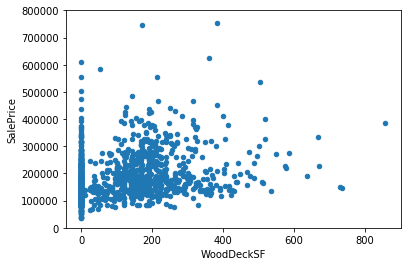

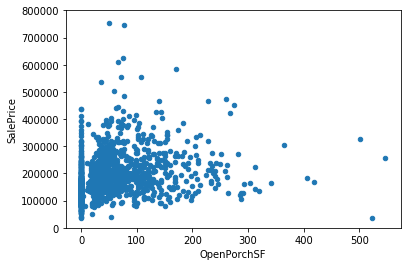

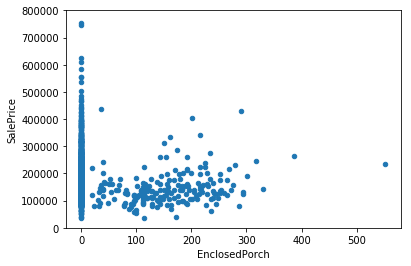

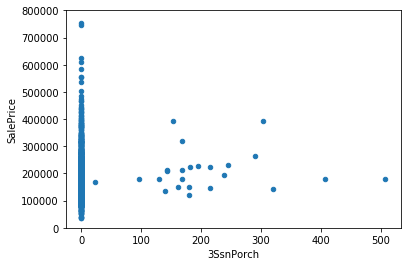

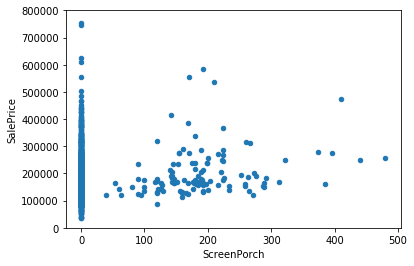

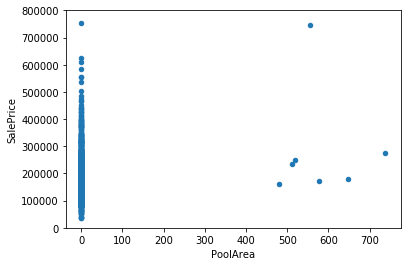

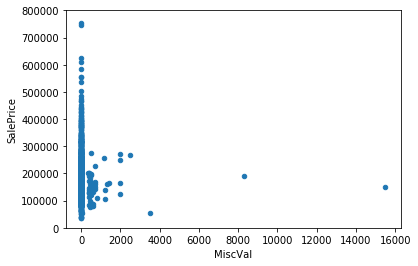

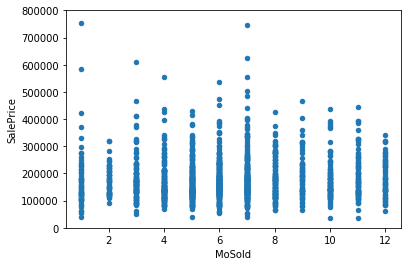

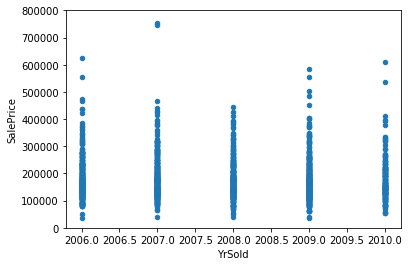

In [0]:
# Linear Regression
num = ['MSSubClass', 'LotFrontage','LotArea','OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
for i in num:
    data = pd.concat([train['SalePrice'], train[i]], axis=1)
    data.plot.scatter(x=i, y='SalePrice', ylim=(0,800000))

### Based on the correlation heatmap, the correlation between GarageCars and GarageArea is too high so that we can drop one of them, so do TotalBsmtSF and 1stFlrSF. So the left numeric features include:
* OverallQual 0.790981600584 
* GrLivArea 0.708624477613 
* GarageCars 0.640409197258 
* TotalBsmtSF 0.613580551559 
* FullBath 0.560663762748 
* TotRmsAbvGrd 0.533723155582 
* YearBuilt 0.522897332879 
* YearRemodAdd 0.507100967111 

### (3) Interactions

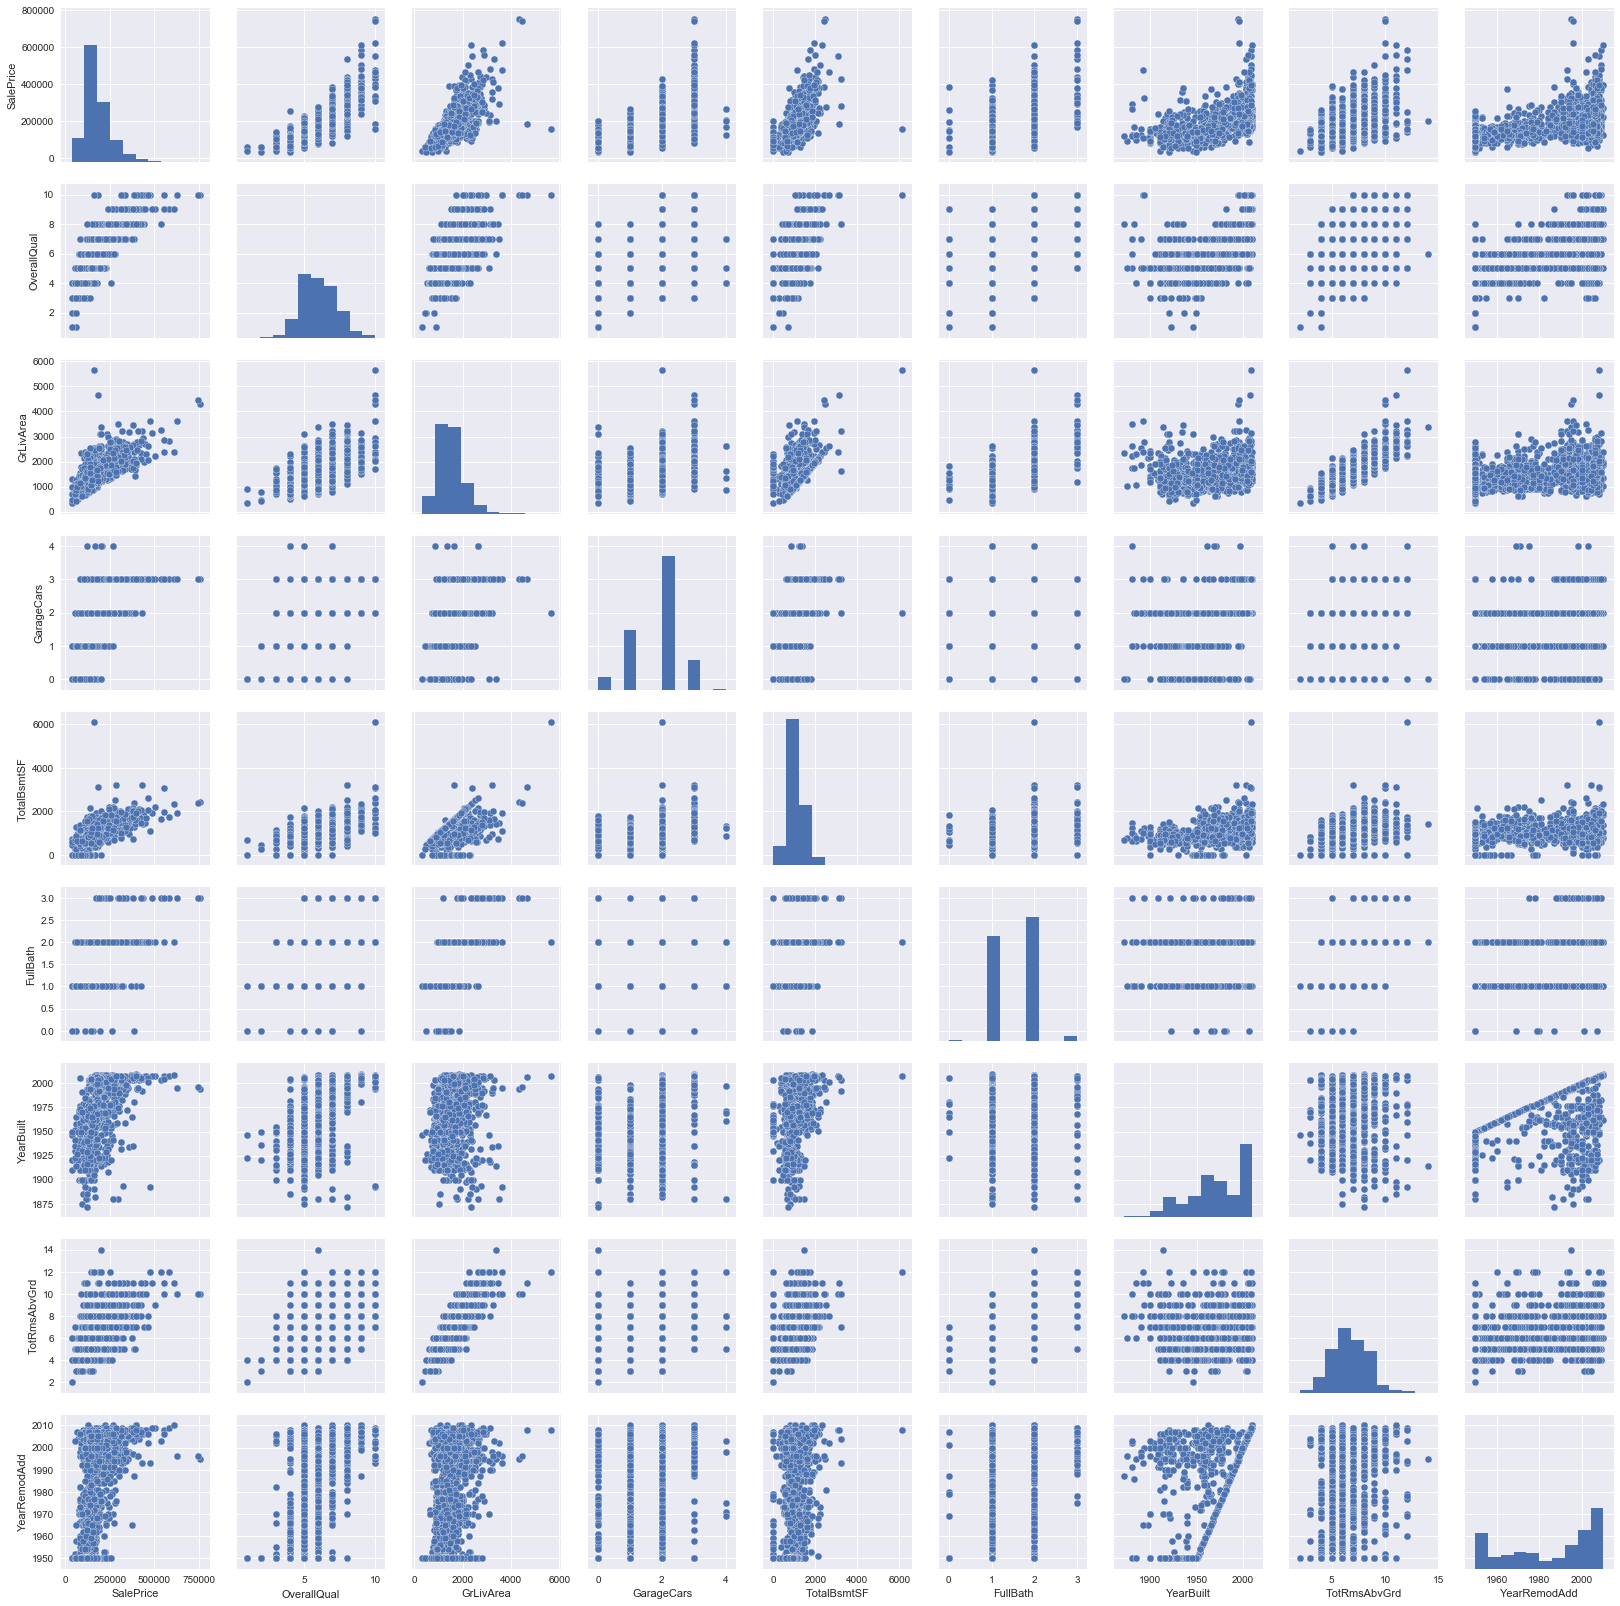

In [0]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'TotRmsAbvGrd',
       'YearRemodAdd']
sns.pairplot(train[cols], size=2.5)

## 3.5 Anomaly, outliers

In [0]:
# missing value
na_count = train.isnull().sum().sort_values(ascending=False)
na_rate = na_count / len(train)
na_data = pd.concat([na_count,na_rate],axis=1,keys=['count','ratio'])
na_data.head(20)

count     ratio
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageCond       81  0.055479
GarageType       81  0.055479
GarageYrBlt      81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
BsmtQual         37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685
Utilities         0  0.000000

### According to the table above, features with ratio which is higher than 0.4 will be deleted for we think features with too much null can hardly fill.

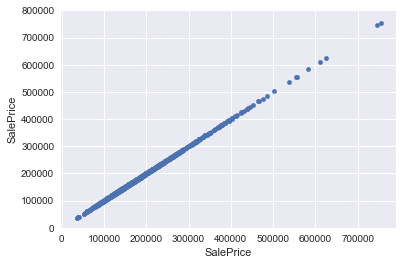

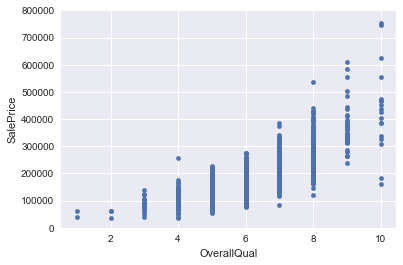

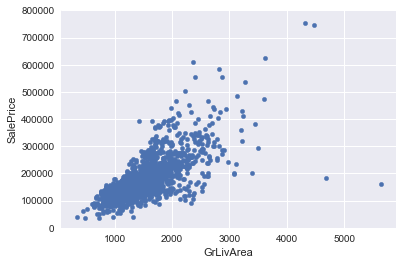

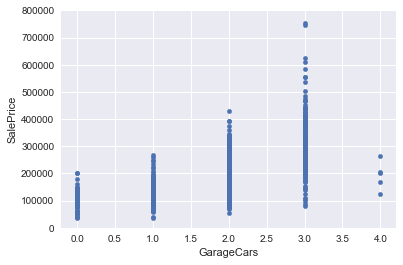

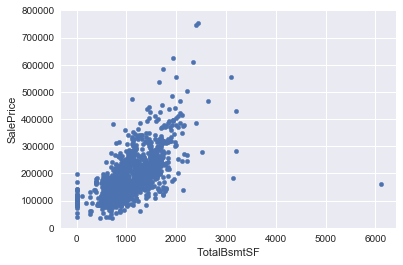

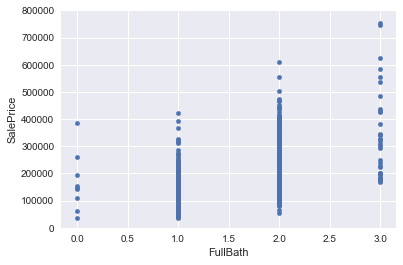

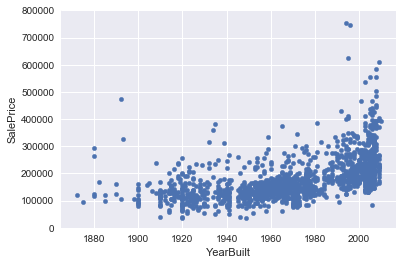

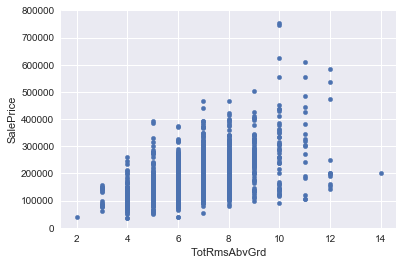

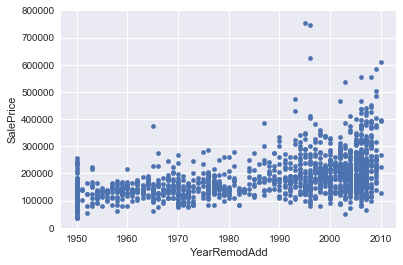

In [0]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'TotRmsAbvGrd',
       'YearRemodAdd']
for i in cols:
    train.plot.scatter(x=i, y='SalePrice', ylim=(0,800000));

### GriLivArea feature:
two point can be viewed as outliers.
### TotalBsmtSF feature:
one point can be viewed as outliers.

# 4. Methodology and Settings (Author: Xin Liu)

## a. Validation Settings
We use 10-fold cross validation for tuning the parameters based on the training dataset.

## b. Performance Measure
The performance measure is Root Mean Squared Logarithmic Error (RMSLE). More specifically, we transform the dependent variable into logarithm scale to achieve the ditribution as normal as possible. Then we use the log form for cross validation in the training set using Root Mean Squared Error. We do the same thing for test set for generating prediction results. Before submitting the prediction results to Kaggle, we transform them using exponential function to the normal scale of house prices.

## c. Baseline Models
XGBRegressor is our baseline model (it is very powerful for Kaggle competitions), which will be elaborated in the next section. We also try different models, i.e., linear regression, Ridge regression, LASSO, random forest regressor, extra trees regressor. 

### Details of the methods and settings in this section will be provided in the next section as we describe the steps of our model.

# 5. Prediction Results (Author: Ziyue Han, Xin Liu, Ruofei Lai, Shiqi Wang)

In this section, for feature selection, we try model free and model based methods. The model free method is elaborated in Subsection a(1), and the model based method is elaborated in Subsection a(2).

## a (1).  Feature Selection -  Model Free

In [0]:
import numpy as np # https://docs.scipy.org/doc/numpy/reference/
import pandas as pd # https://pandas.pydata.org/pandas-docs/stable/
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE
import seaborn as sns
import math

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
file_list = drive.ListFile({'q': "'1vghYJblRUxy5dtuGjBhfULjzorpeRz2A' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: 0420_V2_House.ipynb, id: 1X4V7GITHWVERwpUDGLQrmrXWBkCFohSX
title: train_test.csv, id: 1uKeiBHAkHNJRtG7Kt8VK2GQ5kKdoUn1J
title: 0420_House.ipynb, id: 1_J9l2jGIrQf6A8_nJLKr2saHkFG3zL5G
title: 0417_House.ipynb, id: 19QZbIhaq6emuP6XrHWP8-dFCv04El5ej
title: 0416_2.ipynb, id: 1uAv0YKNDu0rZSkIy0yJuqgM-9TqgQeJo
title: 0416.ipynb, id: 1UKDd_j4f32FNN7cWf35XbevgsxeW8aav
title: 0415_Corrected_2.ipynb, id: 1Z9G5NalmB3KyEFnqV69T0qGyyPyxBARd
title: 0415.ipynb, id: 1PSvyfaVn00nx3Zc0hc4f0HdbqLMrpFPc
title: 0415_Corrected.ipynb, id: 1_cq7xdviFTDN05S0WvPLYPs_9KvgW2I5
title: 0414_House.ipynb, id: 1nqqlpVU2DtHOBDP24Hb51R0UBI4p9qRk
title: train.csv, id: 14TDFgAbfmwr5PcvhiZM1vTnB2xLwszxM
title: test.csv, id: 1ltkGSVLvUKXB3TjzjGCwbWQukz4hu6Ve
title: 0413.ipynb, id: 1CgQv2RAhHE6dMrBdWbwPgOKgZR8QQYHl
title: movie_metadata.csv, id: 1rX03SO_GIxPSLDbIole671LBYne3sp0g
title: IMDB_0411.ipynb, id: 1d02DJ1KMEvhNobQXTbI-5HvEJ3PC7r5T
title: IMDB_0328.ipynb, id: 1URA1g7B7n_sXWQg5_Wj52A9_geaDEi9K


In [0]:
train_downloaded = drive.CreateFile({'id': '1uKeiBHAkHNJRtG7Kt8VK2GQ5kKdoUn1J'})
train_downloaded.GetContentFile('train_test.csv')
# test_downloaded = drive.CreateFile({'id': '1ltkGSVLvUKXB3TjzjGCwbWQukz4hu6Ve'})
# test_downloaded.GetContentFile('test.csv')

In [0]:
train=pd.read_csv('train_test.csv')
train.drop(["Id"], inplace=True, axis=1)

In [0]:
na_count = train.isnull().sum().sort_values(ascending=False)
na_rate = na_count / len(train)
na_data = pd.concat([na_count,na_rate],axis=1,keys=['count','ratio'])
na_data.head(20)

count     ratio
PoolQC         2909  0.996574
MiscFeature    2814  0.964029
Alley          2721  0.932169
Fence          2348  0.804385
SalePrice      1459  0.499829
FireplaceQu    1420  0.486468
LotFrontage     486  0.166495
GarageCond      159  0.054471
GarageYrBlt     159  0.054471
GarageQual      159  0.054471
GarageFinish    159  0.054471
GarageType      157  0.053786
BsmtCond         82  0.028092
BsmtExposure     82  0.028092
BsmtQual         81  0.027749
BsmtFinType2     80  0.027407
BsmtFinType1     79  0.027064
MasVnrType       24  0.008222
MasVnrArea       23  0.007879
MSZoning          4  0.001370

In [0]:
train.drop(["PoolQC","GarageQual"], inplace=True, axis=1)

values = {'LotFrontage': 0,'Electrical': "SBrkr",'MasVnrArea': 0}
train=train.fillna(value=values)


Many missing values are actually meaningful. For example, a missing value in "LotFrontage" means this house does not have LotFrontage, such that we can fill this missing area with 0. Additionally, missing values in "Electrical" are treated in a different way since "Electrical" is a categorical variable. Here, we use "most_frequent" principle to fill out the missing values; that is, since the value "SBrkr" appears the most frequently in this categorical variable, we use this value to fill out the missing areas.

In [0]:
imp_list=['GarageYrBlt']
from sklearn.preprocessing import Imputer 
imp=Imputer(missing_values="NaN", strategy="mean",axis=0) # here the strategy is subject to change.
train[imp_list]=imp.fit_transform(train[imp_list])

In [0]:
train.MiscFeature.unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [0]:
# Should convert: MiscFeature to 'Shed'->num
# drop: GarageCond_nan, GarageFinish_nan, BsmtExposure_nan, BsmtQual_nan, BsmtCond_nan, BsmtFinType1_nan, MasVnrType_nan

In [0]:
train['Shed']=train['MiscVal']
for i, content in enumerate(train.loc[:,'MiscFeature']):
  if content=="Shed":
    train.loc[i,'Shed']=train.loc[i,'MiscVal']
  else:
    train.loc[i,'Shed']=0

### Here, we transform two variables 'MiscFeature' and 'MiscVal' since 'MiscFeature' have too many missing values. The most frequent value in 'MiscFeature' is "Shed". Additionally, if 'MiscFeature' is "Shed", 'MiscVal' is a non-zero value. Thus, our idea is to create a new column named "Shed". If this tuple's 'MiscFeature' is "Shed", then we put this tuple's 'MiscVal' in the "Shed" column; otherwise it is zero. For other values in 'MiscFeature', i.e., 'Gar2', 'Othr', 'TenC', they are too few such that we just ignore them.

In [0]:
train.drop(["MiscFeature","MiscVal"], inplace=True, axis=1)

In [0]:
na_count = train[train._get_numeric_data().columns.values.tolist()].isnull().sum().sort_values(ascending=False)
na_rate = na_count / len(train)
na_data = pd.concat([na_count,na_rate],axis=1,keys=['count','ratio'])
na_data.head(10)

count     ratio
SalePrice      1459  0.499829
BsmtFullBath      2  0.000685
BsmtHalfBath      2  0.000685
BsmtFinSF1        1  0.000343
TotalBsmtSF       1  0.000343
BsmtUnfSF         1  0.000343
BsmtFinSF2        1  0.000343
GarageCars        1  0.000343
GarageArea        1  0.000343
MasVnrArea        0  0.000000

In [0]:
values = {'BsmtFullBath': 0,'BsmtHalfBath': 0,'BsmtFinSF1': 0,'TotalBsmtSF': 0,
          'BsmtUnfSF': 0,'BsmtFinSF2': 0,'GarageCars': 0,'GarageArea': 0}
train=train.fillna(value=values)

In [0]:
font = {'fontname':'Arial', 'size':'14'}
title_font = { 'weight' : 'bold','size':'16'}
plt.hist(train['SalePrice'], bins=20)
plt.title("Distribution of Sale Price")
plt.show()

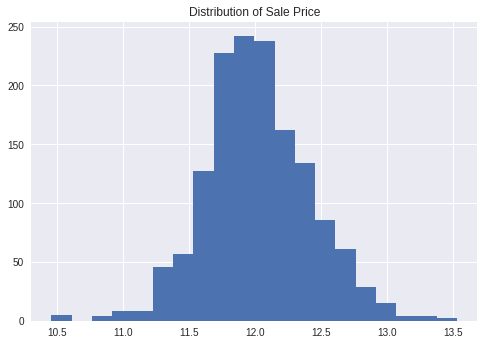

In [0]:
font = {'fontname':'Arial', 'size':'14'}
title_font = { 'weight' : 'bold','size':'16'}
plt.hist(np.log(train['SalePrice']+1), bins=20)
plt.title("Distribution of Sale Price")
plt.show()

In [0]:
labels=np.log(train['SalePrice'][0:1460]+1)
train.drop(["SalePrice"], inplace=True, axis=1)

### The distribution of dependent variable is right skewed. Thus, we should transform it into logarithm scale to achieve the ditribution as normal as possible.

In [0]:
labels

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
5       11.870607
6       12.634606
7       12.206078
8       11.774528
9       11.678448
10      11.771444
11      12.751303
12      11.877576
13      12.540761
14      11.964007
15      11.790565
16      11.911708
17      11.407576
18      11.976666
19      11.842236
20      12.692506
21      11.845110
22      12.345839
23      11.774528
24      11.944714
25      12.454108
26      11.811555
27      12.631344
28      12.242891
29      11.134604
          ...    
1430    12.165985
1431    11.875838
1432    11.074436
1433    12.136192
1434    11.982935
1435    12.066816
1436    11.699413
1437    12.885673
1438    11.916395
1439    12.190964
1440    12.160034
1441    11.913720
1442    12.644331
1443    11.703554
1444    12.098493
1445    11.767575
1446    11.969724
1447    12.388398
1448    11.626263
1449    11.429555
1450    11.820418
1451    12.567555
1452    11.884496
1453    11.344519
1454    12

In [0]:
numeric_features=train._get_numeric_data().columns.values.tolist()

text_features=train.columns.values.tolist()
text_features=[i for i in text_features if i not in numeric_features]



string_features=[]

categorical_features=[i for i in text_features if i not in string_features]

In [0]:
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'SaleType',
 'SaleCondition']

In [0]:
from sklearn.preprocessing import StandardScaler 
scl=StandardScaler() # do we really need this? Will we try PCA?
train[numeric_features]=scl.fit_transform(train[numeric_features])

### We concatenate the training set and test set together. This is to standardize the numeric values in the training set and test set into the same scope. Thus, the trained model is more reasonably applied to the test set.

In [0]:
train_labels=pd.concat([train[numeric_features][0:1460],labels],axis=1)
train_labels.corr(method='pearson')

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.215023 -0.139781     0.032628    -0.059316   
LotFrontage     -0.215023     1.000000  0.100739     0.176561    -0.053457   
LotArea         -0.139781     0.100739  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.176561  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.053457 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.036853  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.078686  0.013788     0.550684     0.073741   
MasVnrArea       0.023573     0.105010  0.103321     0.407252    -0.125694   
BsmtFinSF1      -0.069836     0.076670  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649    -0.009312  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.160829 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.238274  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.245181  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.042549  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.049981  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.220347  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.010514  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333    -0.027856  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.120548  0.126031     0.550600    -0.194149   
HalfBath         0.177354    -0.012952  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.144494  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721     0.034425 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.221396  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.044018  0.271364     0.396765    -0.023820   
GarageYrBlt      0.079867     0.043331 -0.024534     0.518996    -0.306130   
GarageCars      -0.040110     0.165229  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.201473  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579    -0.016780  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.069605  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.027366 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.023499  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.022969  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.114106  0.077672     0.065166    -0.001985   
MoSold          -0.013585     0.018942  0.001205     0.070815    -0.003511   
YrSold          -0.021407    -0.012094 -0.014261    -0.027347     0.043950   
Shed            -0.042495    -0.026833  0.077031    -0.048262     0.101437   
SalePrice       -0.073959     0.179303  0.257320     0.817185    -0.036868   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.023573   -0.069836   -0.065649   
LotFrontage     0.036853      0.078686    0.105010    0.076670   -0.009312   
LotArea         0.014228      0.013788    0.103321    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.407252    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.125694   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.311600    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.176529    0.128451   -0.067759   
MasVnrArea      0.311600      0.176529    1.000000    0.261256   -0.071330   
BsmtFinSF1      0.249503      0.128451    0.261256    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.071330   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.113862   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.360067    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

In [0]:
import operator

from scipy.stats import pearsonr
correl={}
for f in numeric_features:
    correl[f]=pearsonr(train[f][0:1460], labels)
sorted_cor = sorted(correl.items(), key=operator.itemgetter(1), reverse=True)
sorted_cor

[('OverallQual', (0.8171846144867664, 0.0)),
 ('GrLivArea', (0.7009269871427148, 3.058151110246981e-216)),
 ('GarageCars', (0.68062487265819, 3.0933822697553465e-199)),
 ('GarageArea', (0.6508876811435945, 1.1060270514515341e-176)),
 ('TotalBsmtSF', (0.6121342283262258, 7.531828096451882e-151)),
 ('1stFlrSF', (0.596981323185534, 1.0742929799898622e-141)),
 ('FullBath', (0.5947706649972536, 2.1186081278426884e-140)),
 ('YearBuilt', (0.5865701927897158, 1.1036359100656293e-135)),
 ('YearRemodAdd', (0.5656077814623206, 3.211680352818505e-124)),
 ('TotRmsAbvGrd', (0.5344224002094415, 1.2925262145272726e-108)),
 ('GarageYrBlt', (0.501656239795724, 6.874994616543787e-94)),
 ('Fireplaces', (0.4894495451574803, 8.420418798327116e-89)),
 ('MasVnrArea', (0.42677555810052514, 1.0775684674920495e-65)),
 ('BsmtFinSF1', (0.3720232531363672, 3.845514461126193e-49)),
 ('WoodDeckSF', (0.3341351729561152, 2.05521204268977e-39)),
 ('OpenPorchSF', (0.321053251590911, 2.3442818185849423e-36)),
 ('2ndFlrSF'

### We sort each numeric variable's correlation to the dependent variable. Here we eliminate 'GarageArea', 'TotalBsmtSF', '1stFlrSF' since they have the similarly large correlation to 'GarageCars'. If we select all of them into the feature set, they may over-dominate the prediction without considering other features. We elimiate 'MoSold' and '3SsnPorch' for similar reasons. Then we also eliminate 'BsmtFinSF2','BsmtHalfBath','LowQualFinSF', 'YrSold', 'Shed' since they are lowly correlated to dependent variable.

In [0]:
#  Deleted:
#  ('GarageArea', (0.6234314389183616, 5.26503816797602e-158)),
#  ('TotalBsmtSF', (0.6135805515591953, 9.484229391503079e-152)),
#  ('1stFlrSF', (0.6058521846919146, 5.394710618968227e-147)),
# ('MoSold', (0.04643224522381935, 0.07612757850604966)),
#  ('3SsnPorch', (0.0445836653357484, 0.0885817035805626)),
#  ('BsmtFinSF2', (-0.01137812145021514, 0.6639986508340475)),
#  ('BsmtHalfBath', (-0.016844154297359016, 0.5201536357277137)),
#  ('LowQualFinSF', (-0.025606130000679534, 0.3282073098405023)),
#  ('YrSold', (-0.028922585168730326, 0.26941319328087404)),
#  ('Shed', (-0.02952721371164022, 0.25952575212142215)),
num_features_2 =['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea']

In [0]:
import xgboost as xgb
from __future__ import print_function

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

print(__doc__)


# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
X = train[num_features_2][0:1460]
y = labels

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.0, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = { "max_depth":np.arange(3,16,2).tolist()}

scores = ['neg_mean_squared_error'] #, 'recall'

mean_list=[]
std_list=[]
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(xgb.XGBRegressor(), tuned_parameters, cv=5,
                       scoring='%s' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
        mean_list.append(mean)
        std_list.append(std)
    print()

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for neg_mean_squared_error

Best parameters set found on development set:

{'max_depth': 5}

Grid scores on development set:

-0.019 (+/-0.011) for {'max_depth': 3}
-0.019 (+/-0.011) for {'max_depth': 5}
-0.019 (+/-0.012) for {'max_depth': 7}
-0.019 (+/-0.012) for {'max_depth': 9}
-0.020 (+/-0.011) for {'max_depth': 11}
-0.020 (+/-0.010) for {'max_depth': 13}
-0.020 (+/-0.011) for {'max_depth': 15}



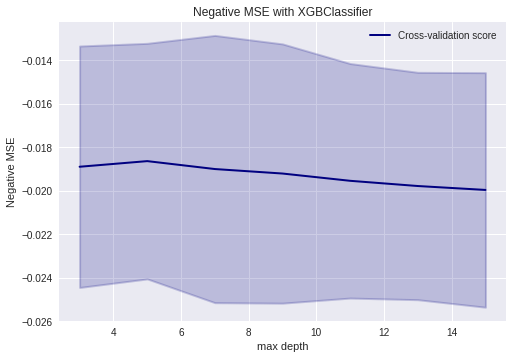

In [0]:
param_range = np.arange(3,16,2)
# param_range = np.logspace(-6, -1, 1)

plt.title("Negative MSE with XGBClassifier")
plt.xlabel("max depth")
plt.ylabel("Negative MSE")
# plt.ylim(0.0, 1.1)
lw = 2
# plt.semilogx(param_range, train_scores_mean, label="Training with cv",
#              color="darkorange", lw=lw)
# plt.plot(param_range, np.asarray(mean_list), label="Training with cv",
#              color="darkorange", lw=lw)
# plt.fill_between(param_range, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2,
#                  color="darkorange", lw=lw)
# plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
#              color="navy", lw=lw)
plt.plot(param_range, np.asarray(mean_list), label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, np.asarray(mean_list) - np.asarray(std_list),
                 np.asarray(mean_list) + np.asarray(std_list), alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

### We only use the numeric variable and the Kaggle score is 0.14061.

In [0]:
for feat in categorical_features:
    train=pd.concat([train, pd.get_dummies(train[feat], prefix=feat, dummy_na=True)],axis=1)

In [0]:
cat_dummies=[i for i in train.columns.values.tolist() if i not in numeric_features]
cat_dummies=[i for i in cat_dummies if i not in text_features]

In [0]:
cat_dummies = [e for e in cat_dummies if e not in ('GarageCond_nan', 'GarageFinish_nan', 'BsmtExposure_nan', 'BsmtQual_nan', 'BsmtCond_nan', 'BsmtFinType1_nan', 'MasVnrType_nan')]

In [0]:
cat_dummies

['MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'MSZoning_nan',
 'Street_Grvl',
 'Street_Pave',
 'Street_nan',
 'Alley_Grvl',
 'Alley_Pave',
 'Alley_nan',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LotShape_nan',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LandContour_nan',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'Utilities_nan',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LotConfig_nan',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'LandSlope_nan',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 '

In [0]:
na_count = train[cat_dummies].isnull().sum().sort_values(ascending=False)
na_rate = na_count / len(train)
na_data = pd.concat([na_count,na_rate],axis=1,keys=['count','ratio'])
na_data.head(20)

count  ratio
SaleCondition_nan        0    0.0
HouseStyle_SFoyer        0    0.0
HouseStyle_1.5Fin        0    0.0
HouseStyle_1.5Unf        0    0.0
HouseStyle_1Story        0    0.0
HouseStyle_2.5Fin        0    0.0
HouseStyle_2.5Unf        0    0.0
HouseStyle_2Story        0    0.0
HouseStyle_SLvl          0    0.0
Exterior2nd_MetalSd      0    0.0
HouseStyle_nan           0    0.0
RoofStyle_Flat           0    0.0
RoofStyle_Gable          0    0.0
RoofStyle_Gambrel        0    0.0
RoofStyle_Hip            0    0.0
RoofStyle_Mansard        0    0.0
BldgType_nan             0    0.0
BldgType_TwnhsE          0    0.0
BldgType_Twnhs           0    0.0
BldgType_Duplex          0    0.0

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
test = SelectKBest(score_func=f_regression, k=14)
fit = test.fit(train[numeric_features+cat_dummies][0:1460], labels)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [0]:
sorted(fit.scores_.tolist(),reverse=True)

[2930.799393462376,
 1408.1216941511343,
 1258.3494927081047,
 1071.7337999383196,
 873.711793793832,
 807.3354126248678,
 798.100327963809,
 764.779834948932,
 685.8407210074067,
 582.8943201221304,
 490.309616517781,
 459.3131918705752,
 324.69547841381535,
 234.20311205119742,
 205.9374192609456,
 200.17239362631616,
 183.23819449349097,
 167.55432108125152,
 165.52228334405305,
 159.45670595218814,
 142.99878200614765,
 121.66448372926729,
 103.38494285674632,
 86.16740430708151,
 83.74750296505864,
 83.12314828975174,
 75.57038154745312,
 68.40390995407441,
 66.62481917324934,
 53.64168771779892,
 52.00380168166083,
 48.43118059529142,
 43.75583016782891,
 41.70378876029795,
 33.27270600889915,
 33.126828759136444,
 32.447731040643724,
 28.701988858135447,
 21.73926307960091,
 8.019062908169692,
 7.658168174094187,
 7.137779404145439,
 4.807769457710613,
 4.407743886117532,
 2.104263007050543,
 2.027283611078056,
 1.9845319913269925,
 0.9446853023797835,
 0.03865945018696384,
 nan

### Typically, there are two feature selection approaches in this situation. One is model free approach, where a function selects several important features, regardless of the type of model to be used. Another one is model based approach, where the important features are selected based on the type of model to be used.

### Here, we try the model free feature selection and try model based afterwards. It is achieved by "SelectKBest" function in Python. The principle is that "SelectKBest" function wil calculate the f_regression statistic (score) between each feature and the dependent variable. Then we sort the scores. It is noted that some variables have the score nan, which interrupts the sort function in Python. Thus, we elimiate these variables first then sort the scores.

In [0]:
filter_nan_list=[True] *train[numeric_features+cat_dummies].shape[1]

In [0]:
for num in list_nan:
  filter_nan_list[num[0]]=False

In [0]:
filter_nan_array=np.asarray(filter_nan_list)

In [0]:
# def is_nan(x):
#     return (x is np.nan or x != x)

# list_ = fit.scores_.tolist()
# sorted(list_, key = lambda x : float('-inf') if is_nan(x) else x, reverse=True)

In [0]:
# mov_sel_num = fit.transform(train[numeric_features+cat_dummies])
# summarize selected features
feature_names = list(train[numeric_features+cat_dummies].columns.values)

mask = filter_nan_array #list of booleans
new_features_no_nan = [] # The list of your K best features

for bool, feature in zip(mask, feature_names):
    if bool:
        new_features_no_nan.append(feature)
        
# train_sel = pd.DataFrame(mov_sel_num, columns=new_features)

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
test = SelectKBest(score_func=f_regression, k=15)
fit = test.fit(train[new_features_no_nan][0:1460], labels)

In [0]:
sorted(fit.scores_.tolist(),reverse=True)

[2930.799393462376,
 1408.1216941511343,
 1258.3494927081047,
 1071.7337999383196,
 873.711793793832,
 807.3354126248678,
 802.7287168450205,
 798.100327963809,
 764.779834948932,
 685.8407210074067,
 594.6525692961427,
 582.8943201221304,
 572.0504989478889,
 512.6062140708239,
 511.6544114309268,
 490.309616517781,
 459.3131918705752,
 430.8759111497767,
 406.00772201532317,
 400.0063966256181,
 351.54476969838794,
 334.55081644481595,
 324.69547841381535,
 310.26184987434306,
 304.74033819591796,
 301.4750573070075,
 288.78690708059054,
 270.1695557555557,
 259.3945189283942,
 234.20311205119742,
 225.20826295238393,
 211.7805154730968,
 205.9374192609456,
 205.66600758877598,
 205.66600758875413,
 200.17239362631616,
 197.4333483270136,
 187.81911773155633,
 187.35352340025526,
 185.72250153618683,
 184.840691524886,
 183.48067099764125,
 183.23819449349097,
 177.20005403075626,
 171.56308567782636,
 169.82746929230584,
 167.55432108125152,
 165.52228334405305,
 159.45670595218814,

### According to the sorted score, we select the variables with scores over 500. There are totally 15 selected parameters.

In [0]:
mov_sel_num = fit.transform(train[new_features_no_nan])
# summarize selected features
feature_names = list(train[new_features_no_nan].columns.values)

mask = test.get_support() #list of booleans
new_features = [] # The list of your K best features

for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)
        
train_sel = pd.DataFrame(mov_sel_num, columns=new_features)

In [0]:
new_features

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'ExterQual_Gd',
 'ExterQual_TA',
 'Foundation_PConc',
 'KitchenQual_TA',
 'FireplaceQu_nan']

In [0]:
import xgboost as xgb
from __future__ import print_function

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

print(__doc__)


# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
X = train_sel[0:1460]
y = labels

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.0, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = { "max_depth":np.arange(3,16,2).tolist()}

scores = ['neg_mean_squared_error'] #, 'recall'

mean_list=[]
std_list=[]
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(xgb.XGBRegressor(), tuned_parameters, cv=5,
                       scoring='%s' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
        mean_list.append(mean)
        std_list.append(std)
    print()

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for neg_mean_squared_error

Best parameters set found on development set:

{'max_depth': 3}

Grid scores on development set:

-0.023 (+/-0.013) for {'max_depth': 3}
-0.024 (+/-0.011) for {'max_depth': 5}
-0.024 (+/-0.011) for {'max_depth': 7}
-0.024 (+/-0.011) for {'max_depth': 9}
-0.025 (+/-0.012) for {'max_depth': 11}
-0.025 (+/-0.012) for {'max_depth': 13}
-0.026 (+/-0.013) for {'max_depth': 15}



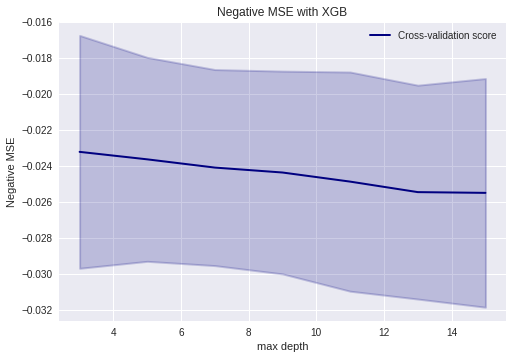

In [0]:
param_range = np.arange(3,16,2)
# param_range = np.logspace(-6, -1, 1)

plt.title("Negative MSE with XGB")
plt.xlabel("max depth")
plt.ylabel("Negative MSE")
# plt.ylim(0.0, 1.1)
lw = 2
# plt.semilogx(param_range, train_scores_mean, label="Training with cv",
#              color="darkorange", lw=lw)
# plt.plot(param_range, np.asarray(mean_list), label="Training with cv",
#              color="darkorange", lw=lw)
# plt.fill_between(param_range, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2,
#                  color="darkorange", lw=lw)
# plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
#              color="navy", lw=lw)
plt.plot(param_range, np.asarray(mean_list), label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, np.asarray(mean_list) - np.asarray(std_list),
                 np.asarray(mean_list) + np.asarray(std_list), alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [0]:
test=train_sel[1460:2919]

In [0]:
clf = xgb.XGBRegressor(max_depth=3)
clf.fit(train[new_features][0:1460], labels)
y_pred = clf.predict(test)

In [0]:
np_array=np.exp(y_pred)-1
np_array_list=np_array.tolist()

### We also try PCA.

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=39)
pca.fit(train[numeric_features+cat_dummies][0:1460])

PCA(copy=True, iterated_power='auto', n_components=39, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [0]:
sum(pca.explained_variance_ratio_)

0.8521135413781512

### We also try PCA. We use 39 components to explain over 85% of the variation.

In [0]:
train_pca = pca.fit_transform(train[numeric_features+cat_dummies][0:1460])

In [0]:
train_pca_Df = pd.DataFrame(data = train_pca)

In [0]:
import xgboost as xgb
from __future__ import print_function

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

print(__doc__)


# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
X = train_pca_Df
y = labels

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.0, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = { "max_depth":np.arange(3,16,2).tolist()}

scores = ['neg_mean_squared_error'] #, 'recall'

mean_list=[]
std_list=[]
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(xgb.XGBRegressor(), tuned_parameters, cv=5,
                       scoring='%s' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
        mean_list.append(mean)
        std_list.append(std)
    print()

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for neg_mean_squared_error

Best parameters set found on development set:

{'max_depth': 5}

Grid scores on development set:

-0.018 (+/-0.012) for {'max_depth': 3}
-0.018 (+/-0.010) for {'max_depth': 5}
-0.019 (+/-0.011) for {'max_depth': 7}
-0.019 (+/-0.011) for {'max_depth': 9}
-0.019 (+/-0.010) for {'max_depth': 11}
-0.019 (+/-0.011) for {'max_depth': 13}
-0.020 (+/-0.011) for {'max_depth': 15}



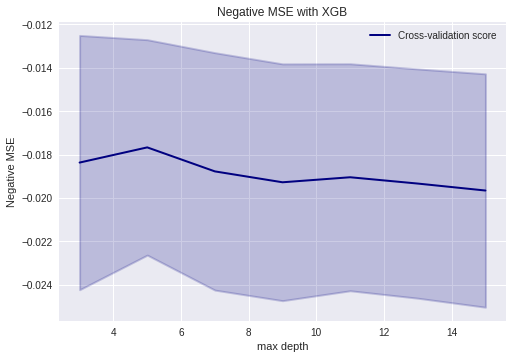

In [0]:
param_range = np.arange(3,16,2)
# param_range = np.logspace(-6, -1, 1)

plt.title("Negative MSE with XGB")
plt.xlabel("max depth")
plt.ylabel("Negative MSE")
# plt.ylim(0.0, 1.1)
lw = 2
# plt.semilogx(param_range, train_scores_mean, label="Training with cv",
#              color="darkorange", lw=lw)
# plt.plot(param_range, np.asarray(mean_list), label="Training with cv",
#              color="darkorange", lw=lw)
# plt.fill_between(param_range, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2,
#                  color="darkorange", lw=lw)
# plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
#              color="navy", lw=lw)
plt.plot(param_range, np.asarray(mean_list), label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, np.asarray(mean_list) - np.asarray(std_list),
                 np.asarray(mean_list) + np.asarray(std_list), alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [0]:
## a (2).  Feature Selection -  Model based

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import xgboost
import csv as csv
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score,KFold
from sklearn.cross_validation import  train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from scipy.stats import skew
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')

In [0]:
# Import data
train_dataset=pd.read_csv('train.csv', header=0)
test_dataset=pd.read_csv('test.csv', header=0)

In [0]:
categorical_features=['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities',
                      'LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
                      'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond',
                      'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',
                      'HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu',
                     'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence',
                     'MiscFeature','SaleType','SaleCondition']
every_column_except_y= [col for col in train_dataset.columns if col not in ['SalePrice','Id']]
train_dataset.describe()


Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

In [0]:

every_column_non_categorical= [col for col in train_dataset.columns if col not in categorical_features and col not in ['Id'] ]


numeric_feats = train_dataset[every_column_non_categorical].dtypes[train_dataset.dtypes != "object"].index


train_dataset[numeric_feats] = np.log1p(train_dataset[numeric_feats])

every_column_non_categorical= [col for col in test_dataset.columns if col not in categorical_features and col not in ['Id'] ]
numeric_feats = test_dataset[every_column_non_categorical].dtypes[test_dataset.dtypes != "object"].index
test_dataset[numeric_feats] = np.log1p(test_dataset[numeric_feats])

In [0]:

features_with_nan=['Alley','MasVnrType','BsmtQual','BsmtQual','BsmtCond','BsmtCond','BsmtExposure',
                   'BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish']
#function that creates a column for every value it might have
def ConverNaNToNAString(data, columnList):
    for x in columnList:       
        data[x] =str(data[x])              
            

ConverNaNToNAString(train_dataset, features_with_nan)
ConverNaNToNAString(test_dataset, features_with_nan)

In [0]:
# Convert categorical data
## get dummies
train_dataset = pd.get_dummies(train_dataset,columns =categorical_features)
test_dataset = pd.get_dummies(test_dataset,columns =categorical_features)


### Here, the feature selection is model based. More specifically, we fit the XGBRegressor model to the data and compute each feature's "feature_importances" to the dependent variable particularly under XGBRegressor model. The sorted "feature_importances" are printed as follows.

In [0]:
# We've tried gridsearch for the best parameters for XGBRegressor model. The best parameter is used as follows.
model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 
every_column_except_y= [col for col in train_dataset.columns if col not in ['SalePrice','Id']]
model.fit(train_dataset[every_column_except_y],train_dataset['SalePrice'])

## feature importance
print(model.feature_importances_)

[5.61330579e-02 6.05220608e-02 1.31901130e-02 1.53384153e-02
 2.98914295e-02 2.41395235e-02 2.69808266e-02 3.33102345e-02
 1.07415104e-02 5.05890511e-02 4.36359420e-02 4.38900441e-02
 2.39547230e-02 1.68630166e-03 5.15592508e-02 5.31300530e-03
 2.97990302e-03 2.65650265e-03 4.57380479e-03 9.12450906e-03
 2.21760222e-03 1.17117120e-02 5.93670597e-03 4.45599444e-02
 3.07230302e-03 4.17417400e-02 3.21090333e-02 3.34257334e-02
 1.26819126e-02 4.85100492e-04 8.61630868e-03 3.46500339e-04
 2.14830204e-03 2.64957268e-02 1.66782159e-02 2.49480247e-03
 2.31000222e-03 4.62000462e-05 6.93000693e-05 2.10210215e-03
 1.59390154e-03 2.31000231e-04 6.93000693e-05 6.23700616e-04
 0.00000000e+00 9.47100925e-04 1.03950105e-03 5.08200494e-04
 2.31000231e-05 1.38600139e-04 1.82490179e-03 1.08570105e-03
 2.07900215e-04 2.97990302e-03 2.56410264e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.74220381e-03 8.31600861e-04
 1.84800185e-04 3.81150376e-03 2.12520221e-03 1.50150154e-03
 5.31300553e-04 3.603603

In [0]:
# Feature selection
for feat, importance in zip(train_dataset[every_column_except_y], model.feature_importances_):
    print ('feature: {f}, importance: {i}'.format(f=feat, i=importance))

feature: LotFrontage, importance: 0.05613305792212486
feature: LotArea, importance: 0.060522060841321945
feature: OverallQual, importance: 0.013190113008022308
feature: OverallCond, importance: 0.015338415279984474
feature: YearBuilt, importance: 0.029891429468989372
feature: YearRemodAdd, importance: 0.02413952350616455
feature: MasVnrArea, importance: 0.026980826631188393
feature: BsmtFinSF1, importance: 0.03331023454666138
feature: BsmtFinSF2, importance: 0.010741510428488255
feature: BsmtUnfSF, importance: 0.050589051097631454
feature: TotalBsmtSF, importance: 0.04363594204187393
feature: 1stFlrSF, importance: 0.04389004409313202
feature: 2ndFlrSF, importance: 0.02395472303032875
feature: LowQualFinSF, importance: 0.0016863016644492745
feature: GrLivArea, importance: 0.05155925080180168
feature: BsmtFullBath, importance: 0.005313005298376083
feature: BsmtHalfBath, importance: 0.0029799030162394047
feature: FullBath, importance: 0.0026565026491880417
feature: HalfBath, importance: 0

### Then, we select the features with "feature_importances" larger than 0.001.

In [0]:
## Select out most relevant features
most_relevant_features= list( dict((k, v) for k, v in zip(train_dataset[every_column_except_y], model.feature_importances_) if v >= 0.001).keys())
print(most_relevant_features)

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold', 'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_120', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Lvl', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_Inside', 'LandSlope_Gtl', 'Neighborhood_BrkSide', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_

In [0]:
# Build model
train_x=train_dataset[most_relevant_features]
train_y=train_dataset['SalePrice']
best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
best_xgb_model.fit(train_x,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_delta_step=0,
       max_depth=3, min_child_weight=1.5, missing=None, n_estimators=10000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
       silent=True, subsample=0.6)

In [0]:
# Submission to csv
test_dataset['Prediction'] = np.expm1(best_xgb_model.predict(test_dataset[most_relevant_features]))
filename = 'submission_xgb.csv'
pd.DataFrame({'Id': test_dataset.Id, 'SalePrice': test_dataset.Prediction}).to_csv(filename, index=False)

### This result is submitted to Kaggle, with 0.12710 score and roughly top 20% ranking.

In [0]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import Lasso
import xgboost as xgb

train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')
data = pd.concat([train_set, test_set], ignore_index=True)
data = data.fillna(0)
data = data.replace({'CentralAir': {'Y': 1, 'N': 0}})

## b. Candidate Models

In this subsection, we try different models to see whether they have better performance than the previously used methods. More particularly, we use linear regression, Ridge regression, LASSO, random forest regressor, extra trees regressor.

In [0]:
def ae(actual, predicted):
    """
    Computes the absolute error.
    This function computes the absolute error between two numbers,
    or for element between a pair of lists or numpy arrays.
    Parameters
    ----------
    actual : int, float, list of numbers, numpy array
             The ground truth value
    predicted : same type as actual
                The predicted value
    Returns
    -------
    score : double or list of doubles
            The absolute error between actual and predicted
    """
    return np.abs(np.array(actual) - np.array(predicted))

def ce(actual, predicted):
    """
    Computes the classification error.
    This function computes the classification error between two lists
    Parameters
    ----------
    actual : list
             A list of the true classes
    predicted : list
                A list of the predicted classes
    Returns
    -------
    score : double
            The classification error between actual and predicted
    """
    return (sum([1.0 for x, y in zip(actual, predicted) if x != y]) / 
            len(actual))

def mae(actual, predicted):
    """
    Computes the mean absolute error.
    This function computes the mean absolute error between two lists
    of numbers.
    Parameters
    ----------
    actual : list of numbers, numpy array
             The ground truth value
    predicted : same type as actual
                The predicted value
    Returns
    -------
    score : double
            The mean absolute error between actual and predicted
    """
    return np.mean(ae(actual, predicted))

def mse(actual, predicted):
    """
    Computes the mean squared error.
    This function computes the mean squared error between two lists
    of numbers.
    Parameters
    ----------
    actual : list of numbers, numpy array
             The ground truth value
    predicted : same type as actual
                The predicted value
    Returns
    -------
    score : double
            The mean squared error between actual and predicted
    """
    return np.mean(se(actual, predicted))

def msle(actual, predicted):
    """
    Computes the mean squared log error.
    This function computes the mean squared log error between two lists
    of numbers.
    Parameters
    ----------
    actual : list of numbers, numpy array
             The ground truth value
    predicted : same type as actual
                The predicted value
    Returns
    -------
    score : double
            The mean squared log error between actual and predicted
    """
    return np.mean(sle(actual, predicted))

def rmse(actual, predicted):
    """
    Computes the root mean squared error.
    This function computes the root mean squared error between two lists
    of numbers.
    Parameters
    ----------
    actual : list of numbers, numpy array
             The ground truth value
    predicted : same type as actual
                The predicted value
    Returns
    -------
    score : double
            The root mean squared error between actual and predicted
    """
    return np.sqrt(mse(actual, predicted))

def rmsle(actual, predicted):
    """
    Computes the root mean squared log error.
    This function computes the root mean squared log error between two lists
    of numbers.
    Parameters
    ----------
    actual : list of numbers, numpy array
             The ground truth value
    predicted : same type as actual
                The predicted value
    Returns
    -------
    score : double
            The root mean squared log error between actual and predicted
    """
    return np.sqrt(msle(actual, predicted))

def se(actual, predicted):
    """
    Computes the squared error.
    This function computes the squared error between two numbers,
    or for element between a pair of lists or numpy arrays.
    Parameters
    ----------
    actual : int, float, list of numbers, numpy array
             The ground truth value
    predicted : same type as actual
                The predicted value
    Returns
    -------
    score : double or list of doubles
            The squared error between actual and predicted
    """
    return np.power(np.array(actual) - np.array(predicted), 2)

def sle(actual, predicted):
    """
    Computes the squared log error.
    This function computes the squared log error between two numbers,
    or for element between a pair of lists or numpy arrays.
    Parameters
    ----------
    actual : int, float, list of numbers, numpy array
             The ground truth value
    predicted : same type as actual
                The predicted value
    Returns
    -------
    score : double or list of doubles
            The squared log error between actual and predicted
    """
    return (np.power(np.log(np.array(actual) + 1) - 
            np.log(np.array(predicted) + 1), 2))

def ll(actual, predicted):
    """
    Computes the log likelihood.
    This function computes the log likelihood between two numbers,
    or for element between a pair of lists or numpy arrays.
    Parameters
    ----------
    actual : int, float, list of numbers, numpy array
             The ground truth value
    predicted : same type as actual
                The predicted value
    Returns
    -------
    score : double or list of doubles
            The log likelihood error between actual and predicted
    """
    actual = np.array(actual)
    predicted = np.array(predicted)
    err = np.seterr(all='ignore')
    score = -(actual * np.log(predicted) + (1 - actual) * np.log(1 - predicted))
    np.seterr(divide=err['divide'], over=err['over'],
              under=err['under'], invalid=err['invalid'])
    if type(score) == np.ndarray:
        score[np.isnan(score)] = 0
    else:
        if np.isnan(score):
            score = 0
    return score

def log_loss(actual, predicted):
    """
    Computes the log loss.
    This function computes the log loss between two lists
    of numbers.
    Parameters
    ----------
    actual : list of numbers, numpy array
             The ground truth value
    predicted : same type as actual
                The predicted value
    Returns
    -------
    score : double
            The log loss between actual and predicted
    """
    return np.mean(ll(actual, predicted))


In [0]:
X = pd.get_dummies(data, sparse=True)
X_train = X[:train_set.shape[0]]
X_test = X[train_set.shape[0]:]

In [0]:
y = train_set.SalePrice
model_lasso = Lasso(alpha=5e-4, max_iter=50000)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.2,gamma=0.0,learning_rate=0.01,max_depth=4,min_child_weight=1.5,n_estimators=7200,reg_alpha=0.9,reg_lambda=0.6,subsample=0.2,seed=42,silent=1)

### Model-LASSO (simple settings)

In [0]:
#Lasso
kfold = KFold(5)
res = []
for train_index, test_index in kfold.split(X_train):
    XX_train, XX_test = X_train.ix[train_index], X_train.ix[test_index]
    yy_train, yy_test = y[train_index], y[test_index]
    model = model_lasso.fit(XX_train,yy_train)
    pred = model.predict(XX_test)
    print(rmsle(yy_test, pred))
    res.append(rmsle(yy_test, pred))    
print("Res = ", np.mean(res))

9.66032103084e-09
2.04252079605e-08
1.92890487373e-08
2.66337490901e-08
0.00160621591304
Res =  0.000321258384274


In [0]:
#Xgb
kfold = KFold(5)
res = []
for train_index, test_index in kfold.split(X_train):
    XX_train, XX_test = X_train.ix[train_index], X_train.ix[test_index]
    yy_train, yy_test = y[train_index], y[test_index]
    model = model_xgb.fit(XX_train,yy_train)
    pred = model.predict(XX_test)
    print(rmsle(yy_test, pred))
    res.append(rmsle(yy_test, pred))    
print("Res = ", np.mean(res))

0.0563145795296
0.0775122969713
0.0623723389233
0.0575732890505
0.0676405002925
Res =  0.0642826009535


In [0]:
import pandas as pd 
import sklearn
import seaborn as sea
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)

Load in the data

In [0]:
house_prices_train = pd.read_csv('train.csv')
house_prices_test = pd.read_csv('test.csv')
house_prices_train.head(2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  

[2 rows x 81 columns]

In [0]:
house_prices_train.shape, house_prices_test.shape

((1460, 81), (1459, 80))

Split the dataframe into its original train and test with all the data transformation intact

In [0]:
train = pd.read_csv('train_engineered.csv')
test = pd.read_csv('test_engineered.csv')
output = pd.read_csv('log_SalePrice.csv', header=None)
output.rename(columns={0: "log_SalePrice"}, inplace=True)
output.head(2)
print train.shape, test.shape, output.shape

(1460, 327) (1459, 327) (1460, 1)


In [0]:
train.head(2)

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0     4.189655  9.042040            7            5       2003          2003   
1     4.394449  9.169623            6            8       1976          1976   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF          ...            \
0    5.283204    6.561031         0.0   5.017280          ...             
1    0.000000    6.886532         0.0   5.652489          ...             

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   

   SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                      0                      0                     0   
1                      0                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  

[2 rows x 327 columns]

In [0]:
output.head(2)

log_SalePrice
0      12.247699
1      12.109016

### Modeling functions

In [0]:
def modelfit(model, dtrain, features, output, validation, validation_output, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    model.fit(dtrain[features], output)
        
    #Predict training set:
    dtrain_predictions = model.predict(dtrain[features])
    validation_predictions = model.predict(validation[features])

    
    #Perform cross-validation:
    from sklearn import cross_validation
    from sklearn import metrics
    if performCV:
        cv_score = cross_validation.cross_val_score(model, dtrain[features], output, cv=cv_folds)
    
    #Print model report:
    print "\nModel Report"
    print "Training R-Square: %.3f" % metrics.r2_score(output, dtrain_predictions)
    print "Training RMSE : %.3f" % np.sqrt(metrics.mean_squared_error(output, dtrain_predictions))    
    print "Validation R-Square: %.3f" % metrics.r2_score(validation_output, validation_predictions)
    print "Validation RMSE : %.3f" % np.sqrt(metrics.mean_squared_error(validation_output, validation_predictions))
    print('Variance score: %.2f' % model.score(validation, validation_output))
    print('Optimal Alpha: %.4f') %model.alpha_ 
    
    if performCV:
        print"Training cv_score: "
        print(cv_score)
        print "CV Score : Mean: %.7g | Std: %.7g | Min: %.7g | Max: %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
        
    if printFeatureImportance:
        df = {'features': features.values, 'Coefficients': model.coef_[0]}
        coefficients = pd.DataFrame(df).sort_values(by='Coefficients', ascending=False)
        plt.figure()
        coefficients.iloc[0:30].plot(x=['features'], kind='bar', title='Top 30 Positive Features')
        plt.ylabel('Feature Coefs')
        plt.figure()
        coefficients.iloc[-30:].plot(x=['features'], kind='bar', title='Top 30 Negative Features')
        plt.ylabel('Feature Coefs')

In [0]:
from sklearn import linear_model

In [0]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, output, test_size=0.2, random_state=37)

In [0]:
features = X_train.columns

### Model - Ridge Regression

In [0]:
#alpha = np.arange(0.01,10,0.05)
#print alpha
alpha = 10**np.random.uniform(-1,1, size=100)
print alpha

[ 1.11625159  0.39922599  1.68102934  0.56833295  0.10871163  6.17535536
  9.69351156  3.73072841  4.48842571  0.14912672  0.62719006  3.08357774
  3.93486218  8.09670267  0.24699175  3.64430654  0.17349999  0.52467388
  0.96402259  0.43625493  8.28109326  0.31412142  6.05296029  0.19989588
  1.01724098  9.01423661  0.16114472  0.12060964  0.10429149  8.72222981
  5.02995899  6.3431346   1.01032901  2.28509499  6.25475841  0.1886414
  4.39481994  3.98158224  0.27458212  6.23883863  0.24116199  0.12716035
  6.61896474  1.96839769  0.26040775  1.05080439  0.88895155  0.24900549
  1.985936    0.55025681  0.67167468  2.79104902  4.05544442  1.82592855
  8.46487728  0.48978213  5.06080473  1.72874125  1.57822671  0.77531001
  0.26752558  1.45464788  2.67384478  4.63335394  1.02206015  0.30906866
  0.81875233  6.34368809  0.39657822  0.62290188  0.12834588  0.22857495
  0.12361455  0.25668006  8.2116387   0.12473145  5.17630515  0.59641132
  5.6033215   5.09650783  2.23898231  8.79845916  1.

In [0]:
ridge = linear_model.RidgeCV(alphas=alpha, fit_intercept=True)


Model Report
Training R-Square: 0.944
Training RMSE : 0.095
Validation R-Square: 0.854
Validation RMSE : 0.145
Variance score: 0.85
Optimal Alpha: 5.6033
Training cv_score: 
[ 0.80782413  0.91192675  0.91414921  0.88311923  0.93084555]
CV Score : Mean: 0.889573 | Std: 0.0436615 | Min: 0.8078241 | Max: 0.9308455


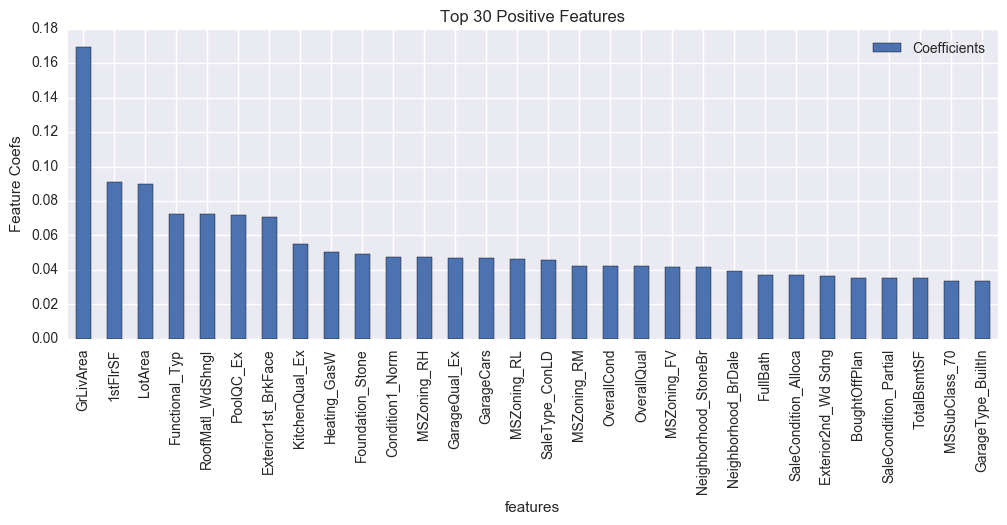

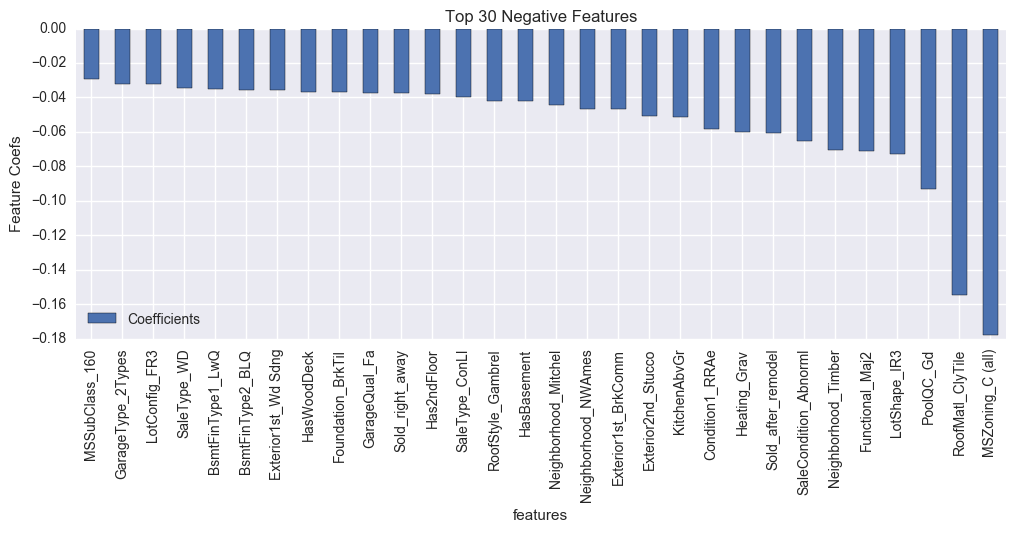

In [0]:
modelfit(ridge, X_train, features, y_train, X_test, y_test, performCV=True, printFeatureImportance=True)

In [0]:
# The coefficients
df = {'features': X_train.columns, 'Coefficients': ridge.coef_[0]}
ridge_coefficients = pd.DataFrame(df).sort_values(by='Coefficients', ascending=False)
ridge_coefficients

Coefficients                 features
14       0.169643                GrLivArea
11       0.090845                 1stFlrSF
1        0.090073                  LotArea
277      0.072547           Functional_Typ
174      0.072341         RoofMatl_WdShngl
305      0.071825                PoolQC_Ex
178      0.070620      Exterior1st_BrkFace
267      0.055156           KitchenQual_Ex
251      0.050475             Heating_GasW
223      0.049027         Foundation_Stone
133      0.047618          Condition1_Norm
83       0.047462              MSZoning_RH
292      0.047076            GarageQual_Ex
23       0.046981               GarageCars
84       0.046272              MSZoning_RL
315      0.045864           SaleType_ConLD
85       0.042358              MSZoning_RM
3        0.042196              OverallCond
2        0.042179              OverallQual
82       0.041806              MSZoning_FV
128      0.041435     Neighborhood_StoneBr
108      0.039137      Neighborhood_BrDale
17       0.037346                 FullBath
323      0.037113     SaleCondition_Alloca
204      0.036678      Exterior2nd_Wd Sdng
57       0.035563            BoughtOffPlan
326      0.035563    SaleCondition_Partial
10       0.035464              TotalBsmtSF
71       0.033864            MSSubClass_70
286      0.033547       GarageType_BuiltIn
203      0.033237      Exterior2nd_VinylSd
172      0.032854         RoofMatl_Tar&Grv
99       0.032058        LotConfig_CulDSac
313      0.031987             SaleType_CWD
15       0.031692             BsmtFullBath
65       0.031417            MSSubClass_20
234      0.031127          BsmtExposure_Gd
119      0.031096     Neighborhood_NPkVill
18       0.030954                 HalfBath
161      0.029936           RoofStyle_Flat
143      0.029731          Condition2_PosA
127      0.029557     Neighborhood_Somerst
278      0.029098           FireplaceQu_Ex
109      0.029079     Neighborhood_BrkSide
87       0.028778              Street_Pave
90       0.028531             LotShape_IR1
273      0.027267          Functional_Min1
168      0.026925         RoofMatl_CompShg
294      0.026822            GarageQual_Gd
211      0.026314             ExterQual_Fa
280      0.026055           FireplaceQu_Gd
112      0.025110     Neighborhood_Crawfor
98       0.024790         LotConfig_Corner
261      0.024282             CentralAir_Y
225      0.024170              BsmtQual_Ex
91       0.023628             LotShape_IR2
214      0.023143             ExterCond_Ex
139      0.022289          Condition1_RRNn
93       0.020472             LotShape_Reg
37       0.020472        IsRegularLotShape
95       0.020381          LandContour_HLS
148      0.019828            BldgType_1Fam
284      0.019740        GarageType_Attchd
255      0.019186             HeatingQC_Ex
154      0.018466        HouseStyle_1.5Unf
322      0.018174    SaleCondition_AdjLand
274      0.017954          Functional_Min2
250      0.017829             Heating_GasA
207      0.017497       MasVnrType_BrkFace
245      0.017481         BsmtFinType2_GLQ
135      0.017480          Condition1_PosN
209      0.017114         MasVnrType_Stone
165      0.017046        RoofStyle_Mansard
282      0.016059           FireplaceQu_TA
137      0.015762          Condition1_RRAn
308      0.015354              Fence_GdPrv
189      0.015188      Exterior1st_WdShing
318      0.015132             SaleType_New
64       0.014682          NeighborhoodBin
16       0.014471             BsmtHalfBath
242      0.014446         BsmtFinType1_Unf
110      0.014209     Neighborhood_ClearCr
197      0.014119      Exterior2nd_ImStucc
314      0.014073             SaleType_Con
175      0.014056      Exterior1st_AsbShng
169      0.013255         RoofMatl_Membran
297      0.013215            GarageCond_Ex
121      0.013178     Neighborhood_NoRidge
243      0.013108         BsmtFinType2_ALQ
306      0.012832                PoolQC_Fa
218      0.012793             ExterCond_TA
310      0.012599              Fence_MnPrv
54    

#### Error metrics are better than for Linear Regression

In [0]:
ridge_prediction = np.exp(ridge.predict(test))-1
ridge_prediction[:,0]

array([ 121611.9920419 ,  158699.2052579 ,  179829.29510898, ...,
        161215.22282638,  117262.35732457,  209447.01344057])

In [0]:
df = pd.DataFrame({'Id': house_prices_test['Id'], 'SalePrice': ridge_prediction[:,0]})
df.head(5)

Id      SalePrice
0  1461  121611.992042
1  1462  158699.205258
2  1463  179829.295109
3  1464  198788.473432
4  1465  202785.847870

In [0]:
#df.to_csv('kaggle_submission_ridge_12102016_1721.csv', index=False)

### Model - LASSO ( 3 groups of different settings)

In [0]:
#alpha = np.arange(0.0001,0.0009,0.00001)
alpha = 10**np.random.uniform(-6,1,size=100)
alpha

array([  5.32807333e-06,   1.91576079e-03,   5.26272138e-06,
         1.12967461e-04,   2.27741490e-03,   1.29943753e-06,
         1.07214672e-03,   3.15921160e+00,   1.73973638e-03,
         3.21074211e-06,   1.56904108e-04,   5.15814629e-02,
         1.12352211e-04,   2.82179761e-05,   3.05459760e-02,
         6.88340342e-02,   2.85616919e-02,   6.86261983e-01,
         6.42435930e-03,   1.09644727e-04,   3.42573029e-06,
         1.98779978e-04,   6.33863281e-03,   2.38068282e-04,
         3.07424012e+00,   1.54973671e-05,   3.23563017e-05,
         2.77879381e-04,   4.81574912e-02,   7.37180872e+00,
         1.22630996e-06,   1.10261477e-01,   3.85043099e-06,
         3.30640798e-05,   1.78138853e-02,   9.74244185e-06,
         1.19158103e+00,   2.26698040e-05,   3.03093950e-02,
         1.63344274e-01,   1.77105143e-06,   6.11511748e-05,
         1.78608480e-03,   2.90600904e-02,   5.78168588e-02,
         4.08235055e-04,   3.33813328e-03,   5.06566182e-01,
         3.37236765e+00,

In [0]:
lasso = linear_model.LassoCV(fit_intercept=True, alphas=alpha)

In [0]:
modelfit(lasso, X_train, features, y_train, X_test, y_test, performCV=True, printFeatureImportance=False)


Model Report
Training R-Square: 0.945
Training RMSE : 0.095
Validation R-Square: 0.866
Validation RMSE : 0.139
Variance score: 0.87
Optimal Alpha: 0.0004
Training cv_score: 
[ 0.80789138  0.92011112  0.92452231  0.90204141  0.93648128]
CV Score : Mean: 0.8982095 | Std: 0.04649478 | Min: 0.8078914 | Max: 0.9364813


In [0]:
# The coefficients
df = {'features': X_train.columns, 'Coefficients': lasso.coef_}
lasso_coefficients = pd.DataFrame(df).sort_values(by='Coefficients', ascending=False)
lasso_coefficients

Coefficients                 features
14   2.715446e-01                GrLivArea
57   7.882832e-02            BoughtOffPlan
1    7.499104e-02                  LotArea
267  6.785197e-02           KitchenQual_Ex
277  6.599744e-02           Functional_Typ
178  5.765395e-02      Exterior1st_BrkFace
133  4.988992e-02          Condition1_Norm
234  4.727246e-02          BsmtExposure_Gd
225  4.427445e-02              BsmtQual_Ex
315  4.422148e-02           SaleType_ConLD
3    4.405650e-02              OverallCond
2    4.379670e-02              OverallQual
109  3.593024e-02     Neighborhood_BrkSide
174  3.490217e-02         RoofMatl_WdShngl
15   3.444733e-02             BsmtFullBath
23   3.394974e-02               GarageCars
204  3.110197e-02      Exterior2nd_Wd Sdng
148  2.995356e-02            BldgType_1Fam
99   2.570758e-02        LotConfig_CulDSac
218  2.313690e-02             ExterCond_TA
71   2.220785e-02            MSSubClass_70
255  2.182779e-02             HeatingQC_Ex
17   1.996626e-02                 FullBath
251  1.969934e-02             Heating_GasW
128  1.959157e-02     Neighborhood_StoneBr
10   1.947383e-02              TotalBsmtSF
223  1.813761e-02         Foundation_Stone
288  1.758750e-02        GarageType_Detchd
18   1.745939e-02                 HalfBath
22   1.678049e-02               Fireplaces
284  1.576644e-02        GarageType_Attchd
64   1.457969e-02          NeighborhoodBin
65   1.404574e-02            MSSubClass_20
42   1.392894e-02             IsPavedDrive
98   1.313336e-02         LotConfig_Corner
127  1.224827e-02     Neighborhood_Somerst
280  1.133118e-02           FireplaceQu_Gd
286  1.124373e-02       GarageType_BuiltIn
198  1.096382e-02      Exterior2nd_MetalSd
29   1.056805e-02              ScreenPorch
11   9.093256e-03                 1stFlrSF
93   8.897656e-03             LotShape_Reg
112  8.693684e-03     Neighborhood_Crawfor
7    8.009755e-03               BsmtFinSF1
104  7.255024e-03            LandSlope_Mod
54   7.068934e-03               HighSeason
221  6.575849e-03         Foundation_PConc
26   6.541027e-03              OpenPorchSF
69   6.186480e-03            MSSubClass_50
95   5.480548e-03          LandContour_HLS
203  4.598011e-03      Exterior2nd_VinylSd
294  4.558556e-03            GarageQual_Gd
310  4.376933e-03              Fence_MnPrv
25   4.215369e-03               WoodDeckSF
30   4.139296e-03                 PoolArea
4    3.805866e-03                YearBuilt
289  2.899448e-03         GarageFinish_Fin
27   2.753504e-03            EnclosedPorch
273  2.431649e-03          Functional_Min1
16   2.271797e-03             BsmtHalfBath
60   2.264640e-03                      Age
13   2.198916e-03             LowQualFinSF
274  1.591821e-03          Functional_Min2
28   1.492173e-03                3SsnPorch
21   1.041432e-03             TotRmsAbvGrd
118  8.992493e-04       Neighborhood_NAmes
5    5.701428e-04             YearRemodAdd
6    1.750393e-04               MasVnrArea
59   1.427637e-04          TotalArea1st2nd
24   5.350803e-05               GarageArea
261  7.626091e-18             CentralAir_Y
181  0.000000e+00      Exterior1st_HdBoard
182 -0.000000e+00      Exterior1st_ImStucc
183  0.000000e+00      Exterior1st_MetalSd
222  0.000000e+00          Foundation_Slab
185 -0.000000e+00        Exterior1st_Stone
220 -0.000000e+00        Foundation_CBlock
184  0.000000e+00      Exterior1st_Plywood
235  0.000000e+00          BsmtExposure_Mn
180  0.000000e+00      Exterior1st_CemntBd
179  0.000000e+00       Exterior1st_CBlock
226 -0.000000e+00              BsmtQual_Fa
227 -0.000000e+00              BsmtQual_Gd
228 -0.000000e+00              BsmtQual_TA
230 -0.000000e+00              BsmtCond_Gd
231 -0.000000e+00              BsmtCond_Po
232  0.000000e+00              BsmtCond_TA
224 -0.000000e+00          Foundation_Wood
217 -0.000000e+00             ExterCond_Po
186 -0.000000e+00       Exterior1st_Stucco
202 -0.000000e+00       Exterior2nd_Stucco
177 -0.000000e+00      Exterior1st_BrkComm
201 -0

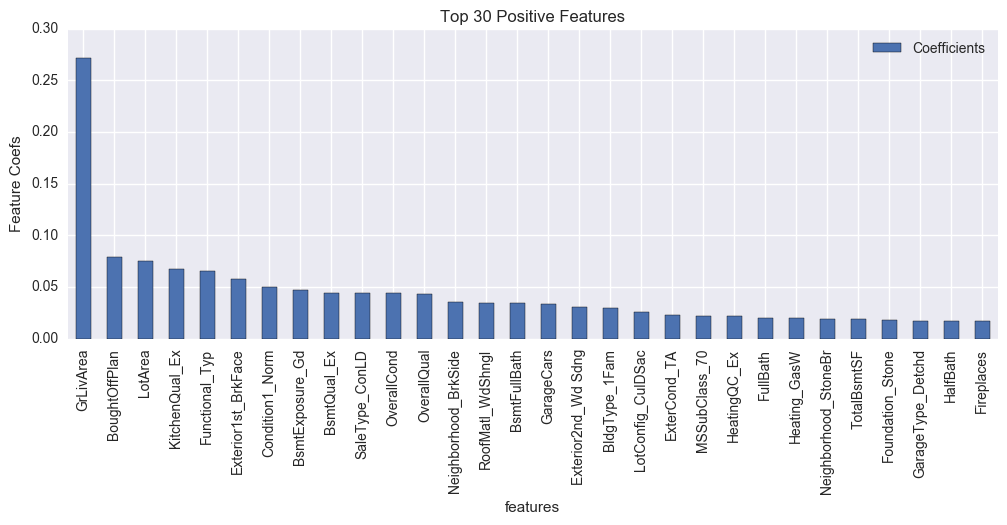

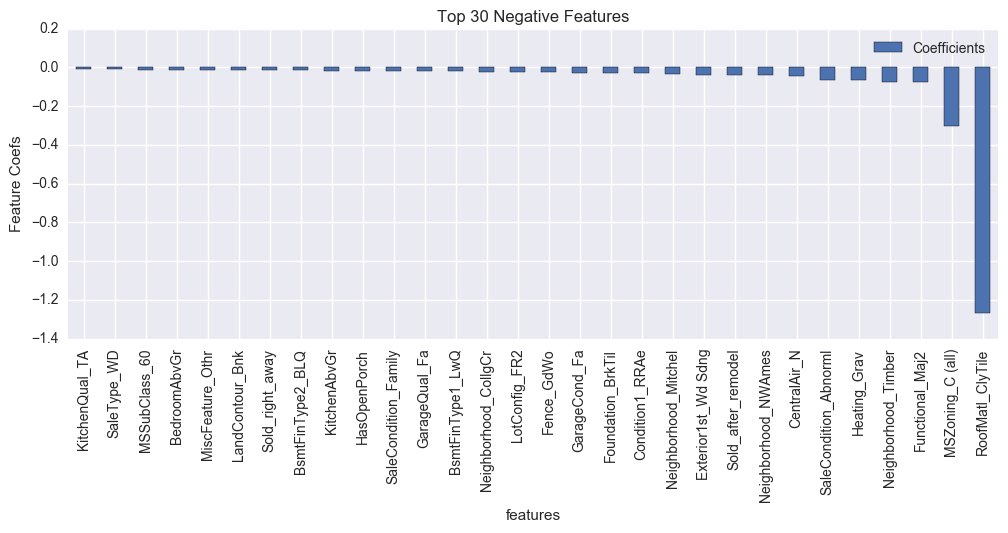

In [0]:
df = {'features': features.values, 'Coefficients': lasso.coef_}
coefficients = pd.DataFrame(df).sort_values(by='Coefficients', ascending=False)
plt.figure()
coefficients.iloc[0:30].plot(x=['features'], kind='bar', title='Top 30 Positive Features')
plt.ylabel('Feature Coefs')
plt.figure()
coefficients.iloc[-30:].plot(x=['features'], kind='bar', title='Top 30 Negative Features')
plt.ylabel('Feature Coefs')

In [0]:
train = pd.read_csv('train_engineered2.csv')
test = pd.read_csv('test_engineered2.csv')
output = pd.read_csv('log_SalePrice2.csv', header=None)
output.rename(columns={0: "log_SalePrice"}, inplace=True)
output.head(2)
print train.shape, test.shape, output.shape

(1460, 299) (1459, 299) (1460, 1)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(train, output, test_size=0.2, random_state=37)
features = X_train.columns

In [0]:
lasso2 = linear_model.LassoCV(fit_intercept=True, alphas=alpha)

In [0]:
modelfit(lasso2, X_train, features, y_train, X_test, y_test, performCV=True, printFeatureImportance=False)


Model Report
Training R-Square: 0.943
Training RMSE : 0.096
Validation R-Square: 0.879
Validation RMSE : 0.132
Variance score: 0.88
Optimal Alpha: 0.0004
Training cv_score: 
[ 0.84884096  0.9214531   0.92170614  0.90185449  0.93228743]
CV Score : Mean: 0.9052284 | Std: 0.02985925 | Min: 0.848841 | Max: 0.9322874


In [0]:
# The coefficients
df = {'features': X_train.columns, 'Coefficients': lasso2.coef_}
lasso_coefficients2 = pd.DataFrame(df).sort_values(by='Coefficients', ascending=False)
lasso_coefficients2

Coefficients               features
14       0.401785              GrLivArea
93       0.092485   Neighborhood_NoRidge
100      0.091033   Neighborhood_StoneBr
84       0.082715   Neighborhood_Crawfor
239      0.072785         KitchenQual_Ex
99       0.072354   Neighborhood_Somerst
249      0.069864         Functional_Typ
1        0.069747                LotArea
150      0.064832    Exterior1st_BrkFace
146      0.058301       RoofMatl_WdShngl
11       0.057281               1stFlrSF
94       0.051773   Neighborhood_NridgHt
197      0.050752            BsmtQual_Ex
105      0.049395        Condition1_Norm
206      0.048017        BsmtExposure_Gd
2        0.047859            OverallQual
3        0.044321            OverallCond
82       0.042269   Neighborhood_ClearCr
23       0.035966             GarageCars
298      0.034130  SaleCondition_Partial
81       0.031339   Neighborhood_BrkSide
15       0.030972           BsmtFullBath
120      0.030142          BldgType_1Fam
71       0.027997      LotConfig_CulDSac
17       0.027258               FullBath
223      0.024239           Heating_GasW
190      0.024005           ExterCond_TA
287      0.023822         SaleType_ConLD
43       0.022398          MSSubClass_70
227      0.022079           HeatingQC_Ex
176      0.020215    Exterior2nd_Wd Sdng
18       0.020097               HalfBath
22       0.019914             Fireplaces
10       0.019217            TotalBsmtSF
195      0.016949       Foundation_Stone
260      0.014934      GarageType_Detchd
70       0.014933       LotConfig_Corner
37       0.014623          MSSubClass_20
258      0.013992     GarageType_BuiltIn
155      0.011579    Exterior1st_MetalSd
193      0.010687       Foundation_PConc
29       0.010020            ScreenPorch
48       0.009903         MSSubClass_120
65       0.008867           LotShape_Reg
7        0.008756             BsmtFinSF1
252      0.008536         FireplaceQu_Gd
276      0.008132           PavedDrive_Y
30       0.007714               PoolArea
256      0.007359      GarageType_Attchd
76       0.006812          LandSlope_Mod
282      0.005144            Fence_MnPrv
21       0.004962           TotRmsAbvGrd
175      0.004711    Exterior2nd_VinylSd
25       0.004024             WoodDeckSF
250      0.003292         FireplaceQu_Ex
27       0.002431          EnclosedPorch
246      0.001907        Functional_Min2
4        0.001784              YearBuilt
266      0.000915          GarageQual_Gd
26       0.000894            OpenPorchSF
5        0.000584           YearRemodAdd
261      0.000520       GarageFinish_Fin
54       0.000511            MSZoning_FV
6        0.000146             MasVnrArea
170      0.000097    Exterior2nd_MetalSd
24       0.000062             GarageArea
211      0.000000       BsmtFinType1_GLQ
209      0.000000       BsmtFinType1_ALQ
214      0.000000       BsmtFinType1_Unf
198     -0.000000            BsmtQual_Fa
199     -0.000000            BsmtQual_Gd
201     -0.000000            BsmtCond_Fa
213     -0.000000       BsmtFinType1_Rec
202     -0.000000            BsmtCond_Gd
203     -0.000000            BsmtCond_Po
204     -0.000000            BsmtCond_TA
166      0.000000     Exterior2nd_CBlock
205     -0.000000        BsmtExposure_Av
165     -0.000000    Exterior2nd_BrkFace
167     -0.000000    Exterior2nd_CmentBd
163     -0.000000    Exterior2nd_AsphShn
162     -0.000000    Exterior2nd_AsbShng
207      0.000000        BsmtExposure_Mn
164     -0.000000    Exterior2nd_Brk Cmn
186      0.000000           ExterCond_Ex
168      0.000000    Exterior2nd_HdBoard
169      0.000000    Exterior2nd_ImStucc
184      0.000000           ExterQual_Gd
187     -0.000000           ExterCond_Fa
188     -0.000000           ExterCond_Gd
189     -0.000000           ExterCond_Po
183      0.000000           ExterQual_Fa
182      0.000000           ExterQual_Ex
181      0.000000       MasVnrType_Stone
180      0.000000        MasVnrType_None
179      0.000000     MasVnrType_BrkFace
178     -0.000000      MasVn

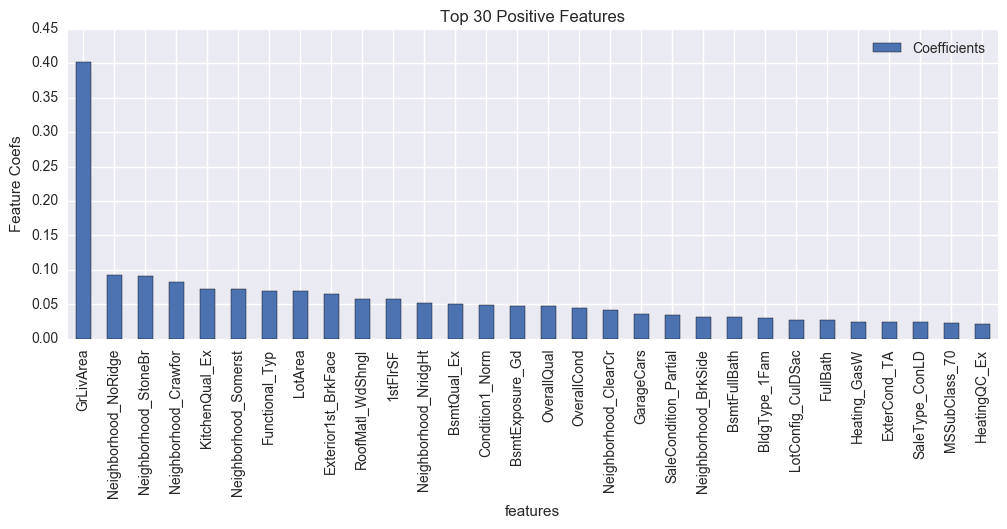

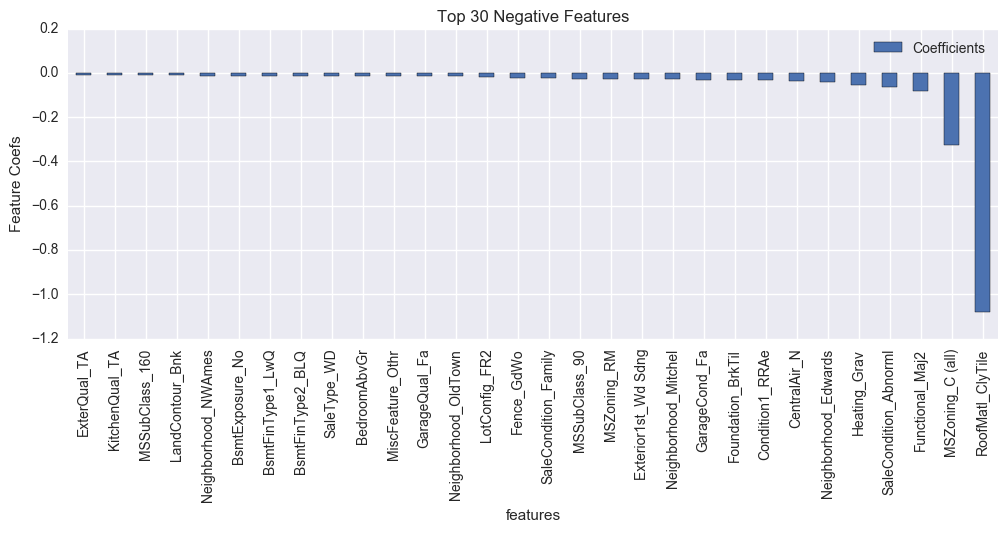

In [0]:
coefficients = pd.DataFrame(df).sort_values(by='Coefficients', ascending=False)
plt.figure()
coefficients.iloc[0:30].plot(x=['features'], kind='bar', title='Top 30 Positive Features')
plt.ylabel('Feature Coefs')
plt.figure()
coefficients.iloc[-30:].plot(x=['features'], kind='bar', title='Top 30 Negative Features')
plt.ylabel('Feature Coefs')

In [0]:
prediction = np.expm1(lasso2.predict(test))
prediction

array([ 121731.81553993,  156388.62900143,  179713.18822747, ...,
        163970.80477182,  117051.73071529,  220868.78380384])

In [0]:
df = pd.DataFrame({'Id': house_prices_test['Id'], 'SalePrice': prediction})
df.head(5)

Id      SalePrice
0  1461  121731.815540
1  1462  156388.629001
2  1463  179713.188227
3  1464  196505.777224
4  1465  198846.856435

In [0]:
df.to_csv('kaggle_submission_lasso_01012017.csv', index=False)

In [0]:
train = pd.read_csv('train_human_analog.csv')
test = pd.read_csv('test_human_analog.csv')
output = pd.read_csv('output_human_analog.csv', header=None)
output.rename(columns={0: "log_SalePrice"}, inplace=True)
output.drop(0, axis=0, inplace=True)
output.head(2)
print train.shape, test.shape, output.shape

(1456, 403) (1459, 403) (1456, 1)


In [0]:
output.head(5)

log_SalePrice
1  12.2476991164
2  12.1090164423
3  12.3171711673
4  11.8494048444
5  12.4292201968

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train, output, test_size=0.2, random_state=37)
features = X_train.columns

In [0]:
lasso3 = linear_model.LassoCV(fit_intercept=True, alphas=alpha)

In [0]:
modelfit(lasso3, X_train, features, y_train, X_test, y_test, performCV=True, printFeatureImportance=False)


Model Report
Training R-Square: 0.947
Training RMSE : 0.091
Validation R-Square: 0.909
Validation RMSE : 0.120
Variance score: 0.91
Optimal Alpha: 0.0005
Training cv_score: 
[ 0.90800214  0.91409229  0.91651396  0.92300424  0.92823103]
CV Score : Mean: 0.9179687 | Std: 0.007030608 | Min: 0.9080021 | Max: 0.928231


In [0]:
# The coefficients
df = {'features': X_train.columns, 'Coefficients': lasso3.coef_}
lasso_coefficients2 = pd.DataFrame(df).sort_values(by='Coefficients', ascending=False)
lasso_coefficients2

Coefficients                   features
125      0.119621               _MSZoning_FV
9        0.119211                  GrLivArea
126      0.088215               _MSZoning_RH
137      0.062745      _Neighborhood_BrkSide
26       0.058691                OverallQual
53       0.049681                   MSZoning
189      0.045587       _Exterior1st_BrkFace
309      0.044723            _KitchenQual_Ex
161      0.040599           _Condition1_Norm
27       0.037810                OverallCond
294      0.033586               _BsmtQual_Ex
89       0.033174                  TotalArea
6        0.032834                TotalBsmtSF
43       0.031222                  YearBuilt
85       0.030957          Neighborhood_Good
226      0.029804              _SaleType_New
12       0.026122                OpenPorchSF
334      0.025622           _BsmtExposure_Gd
65       0.025336              SaleCondition
79       0.023377               HasOpenPorch
35       0.020263                 GarageQual
18       0.019135                   FullBath
24       0.018359                 GarageCars
3        0.017982                 BsmtFinSF1
110      0.017420            NeighborhoodBin
40       0.015815                 Functional
16       0.015493               BsmtFullBath
401      0.015369         _NeighborhoodBin_3
25       0.014650                 CentralAir
386      0.013807   _GarageYrBltBin_YearBin7
395      0.013097  _YearRemodAddBin_YearBin5
19       0.012999                   HalfBath
32       0.011997                  HeatingQC
15       0.010484                ScreenPorch
96       0.010231           SimplOverallCond
87       0.010137              BoughtOffPlan
22       0.009971               TotRmsAbvGrd
193      0.009832       _Exterior1st_MetalSd
11       0.009593                 WoodDeckSF
63       0.009327                 Foundation
130      0.009113         _LotConfig_CulDSac
61       0.009102                Exterior2nd
37       0.008511               BsmtExposure
58       0.008162                 HouseStyle
7        0.008034                   1stFlrSF
163      0.007975           _Condition1_PosN
391      0.007805     _YearBuiltBin_YearBin5
10       0.007387                 GarageArea
251      0.007301          _Electrical_FuseF
390      0.007111     _YearBuiltBin_YearBin4
1        0.006628                    LotArea
156      0.006404      _Neighborhood_StoneBr
84       0.006266              NewerDwelling
59       0.005878                  RoofStyle
257      0.005846        _GarageType_BuiltIn
29       0.005798                  ExterCond
101      0.005604            SimplFunctional
50       0.005375                     PoolQC
70       0.005306           IsGarageDetached
372      0.005035                  _MoSold_5
100      0.004588           SimplFireplaceQu
139      0.004568      _Neighborhood_CollgCr
104      0.004339          SimplBsmtFinType1
99       0.004267            SimplGarageQual
38       0.004018               BsmtFinType1
280      0.003926          _RoofMatl_WdShngl
86       0.003576    SaleCondition_PriceDown
41       0.003499               GarageFinish
71       0.003435               IsPavedDrive
400      0.003323         _NeighborhoodBin_2
83       0.003317                 HighSeason
34       0.003009                FireplaceQu
14       0.002969                  3SsnPorch
33       0.002595                KitchenQual
17       0.002539               BsmtHalfBath
76       0.002397                Has2ndFloor
23       0.002199                 Fireplaces
338      0.001042          _BsmtFinType1_ALQ
66       0.000938          IsRegularLotShape
42       0.000688                      Fence
30       0.000589                   BsmtQual
62       0.000561                 MasVnrType
68       0.000559          IsLandSlopeGentle
56       0.000466                 Condition1
105      0.000290          SimplBsmtFinType2
282      0.000216              _Heating_GasW
92       0.000064              TimeSinceSold
284      0.000000              _Heating_Wall


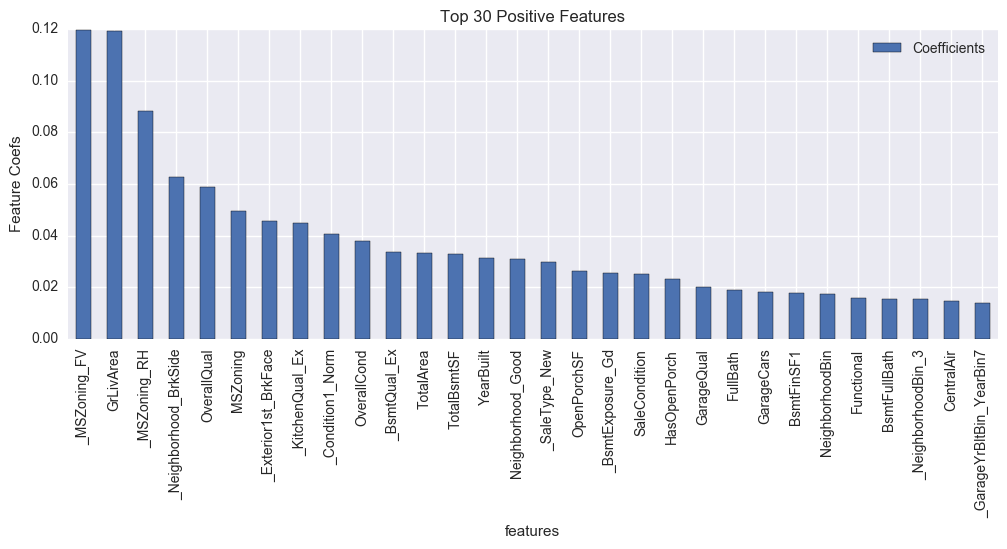

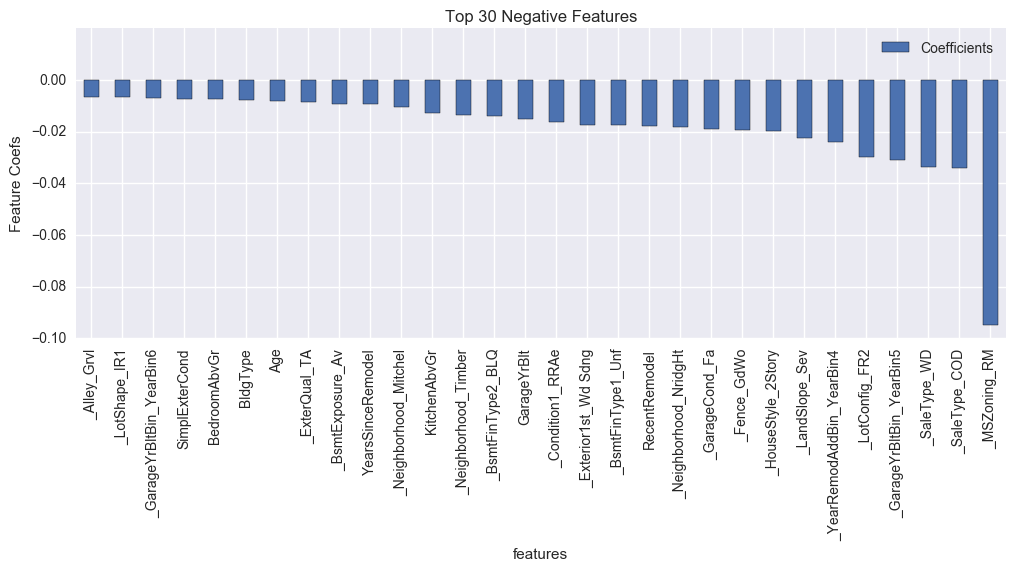

In [0]:
coefficients = pd.DataFrame(df).sort_values(by='Coefficients', ascending=False)
plt.figure()
coefficients.iloc[0:30].plot(x=['features'], kind='bar', title='Top 30 Positive Features')
plt.ylabel('Feature Coefs')
plt.figure()
coefficients.iloc[-30:].plot(x=['features'], kind='bar', title='Top 30 Negative Features')
plt.ylabel('Feature Coefs')

In [0]:
prediction = np.expm1(lasso3.predict(test))
prediction
df = pd.DataFrame({'Id': house_prices_test['Id'], 'SalePrice': prediction})
df.head(5)

Id      SalePrice
0  1461  120371.268795
1  1462  156658.036708
2  1463  180361.735106
3  1464  195368.603290
4  1465  201711.009032

In [0]:
df.to_csv('kaggle_submission_lasso_01012017_2.csv', index=False)

### We submit results from these different models to Kaggle. These results are only close to our best results in the previous sections.

## c. Emsemble Methods

In this subsection, we use several emsembled methods, involving feature expansion and stacking.

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import xgboost
import csv as csv
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score,KFold
from sklearn.cross_validation import  train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from scipy.stats import skew
from collections import OrderedDict
import warnings
from sklearn import model_selection
warnings.filterwarnings('ignore')

In [0]:
train=pd.read_csv('train_test.csv')
train.drop(["Id"], inplace=True, axis=1)

In [0]:
na_count = train.isnull().sum().sort_values(ascending=False)
na_rate = na_count / len(train)
na_data = pd.concat([na_count,na_rate],axis=1,keys=['count','ratio'])
na_data.head(20)

count     ratio
PoolQC         2909  0.996574
MiscFeature    2814  0.964029
Alley          2721  0.932169
Fence          2348  0.804385
SalePrice      1459  0.499829
FireplaceQu    1420  0.486468
LotFrontage     486  0.166495
GarageCond      159  0.054471
GarageYrBlt     159  0.054471
GarageQual      159  0.054471
GarageFinish    159  0.054471
GarageType      157  0.053786
BsmtCond         82  0.028092
BsmtExposure     82  0.028092
BsmtQual         81  0.027749
BsmtFinType2     80  0.027407
BsmtFinType1     79  0.027064
MasVnrType       24  0.008222
MasVnrArea       23  0.007879
MSZoning          4  0.001370

In [0]:
train.drop(["PoolQC","GarageQual"], inplace=True, axis=1)

values = {'LotFrontage': 0,'Electrical': "SBrkr",'MasVnrArea': 0}
train=train.fillna(value=values)


In [0]:
imp_list=['GarageYrBlt']
from sklearn.preprocessing import Imputer 
imp=Imputer(missing_values="NaN", strategy="mean",axis=0) # here the strategy is subject to change.
train[imp_list]=imp.fit_transform(train[imp_list])

In [0]:
train['Shed']=train['MiscVal']
for i, content in enumerate(train.loc[:,'MiscFeature']):
        if content=="Shed":
            train.loc[i,'Shed']=train.loc[i,'MiscVal']
        else:
            train.loc[i,'Shed']=0

In [0]:
train.drop(["MiscFeature","MiscVal"], inplace=True, axis=1)

In [0]:
na_count = train[train._get_numeric_data().columns.values.tolist()].isnull().sum().sort_values(ascending=False)
na_rate = na_count / len(train)
na_data = pd.concat([na_count,na_rate],axis=1,keys=['count','ratio'])
na_data.head(10)

count     ratio
SalePrice      1459  0.499829
BsmtFullBath      2  0.000685
BsmtHalfBath      2  0.000685
BsmtFinSF1        1  0.000343
TotalBsmtSF       1  0.000343
BsmtUnfSF         1  0.000343
BsmtFinSF2        1  0.000343
GarageCars        1  0.000343
GarageArea        1  0.000343
MasVnrArea        0  0.000000

In [0]:
values = {'BsmtFullBath': 0,'BsmtHalfBath': 0,'BsmtFinSF1': 0,'TotalBsmtSF': 0,
          'BsmtUnfSF': 0,'BsmtFinSF2': 0,'GarageCars': 0,'GarageArea': 0}
train=train.fillna(value=values)

In [0]:
labels=np.log(train['SalePrice'][0:1460]+1)
train.drop(["SalePrice"], inplace=True, axis=1)

In [0]:
numeric_features=train._get_numeric_data().columns.values.tolist()

text_features=train.columns.values.tolist()
text_features=[i for i in text_features if i not in numeric_features]



string_features=[]

categorical_features=[i for i in text_features if i not in string_features]

In [0]:
train_labels=pd.concat([train[numeric_features][0:1460],labels],axis=1)
train_labels.corr(method='pearson')

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.215023 -0.139781     0.032628    -0.059316   
LotFrontage     -0.215023     1.000000  0.100739     0.176561    -0.053457   
LotArea         -0.139781     0.100739  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.176561  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.053457 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.036853  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.078686  0.013788     0.550684     0.073741   
MasVnrArea       0.023573     0.105010  0.103321     0.407252    -0.125694   
BsmtFinSF1      -0.069836     0.076670  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649    -0.009312  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.160829 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.238274  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.245181  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.042549  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.049981  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.220347  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.010514  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333    -0.027856  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.120548  0.126031     0.550600    -0.194149   
HalfBath         0.177354    -0.012952  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.144494  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721     0.034425 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.221396  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.044018  0.271364     0.396765    -0.023820   
GarageYrBlt      0.079867     0.043331 -0.024534     0.518996    -0.306130   
GarageCars      -0.040110     0.165229  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.201473  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579    -0.016780  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.069605  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.027366 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.023499  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.022969  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.114106  0.077672     0.065166    -0.001985   
MoSold          -0.013585     0.018942  0.001205     0.070815    -0.003511   
YrSold          -0.021407    -0.012094 -0.014261    -0.027347     0.043950   
Shed            -0.042495    -0.026833  0.077031    -0.048262     0.101437   
SalePrice       -0.073959     0.179303  0.257320     0.817185    -0.036868   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.023573   -0.069836   -0.065649   
LotFrontage     0.036853      0.078686    0.105010    0.076670   -0.009312   
LotArea         0.014228      0.013788    0.103321    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.407252    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.125694   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.311600    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.176529    0.128451   -0.067759   
MasVnrArea      0.311600      0.176529    1.000000    0.261256   -0.071330   
BsmtFinSF1      0.249503      0.128451    0.261256    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.071330   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.113862   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.360067    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

### At the point, we try another model based feature selection algorithm, i.e., recursive feature elimination (RFE). RFE is based on the idea of backward feature selection. Here we select the best 18 features.

In [0]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectPercentile
from sklearn.linear_model import LogisticRegression
# select = SelectPercentile(percentile=65) 
# select.fit(train_labels, labels)
# train_selected = select.transform(train_labels)
# train_selected
# print("X_selected.shape: {}".format(train_selected.shape))
LR = LogisticRegression()
rfe = RFE(LR,18)
rfe = rfe.fit(train_labels, labels.astype('int'))
print (rfe.support_)
print (rfe.ranking_)

[False False False  True  True False  True  True False False False False
 False False False False  True  True  True  True  True  True  True  True
  True  True False  True False  True False False False False  True False
  True]
[ 7  8 20  1  1  5  1  1 17  3 15 14 12 11  6 10  1  1  1  1  1  1  1  1
  1  1 18  1 13  1  9  4 16  2  1 19  1]


In [0]:
from sklearn.preprocessing import PolynomialFeatures
# Feature expansion, interaction_only=False
poly=PolynomialFeatures(interaction_only=False, include_bias = False)
X_exp_inter_false=poly.fit_transform(train_labels)
print('Train dataset size after pairwise interactions(interaction_only=False):', X_exp_inter_false.shape)
X_exp=poly.fit_transform(train_labels)


Train dataset size after pairwise interactions(interaction_only=False): (1460, 740)


### We try feature expansion using the "PolynomialFeatures" strategy.

In [0]:
#feature expansion interaction_only=True
from sklearn.pipeline import make_pipeline
seed = 1
validation_size = 0.20
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(train_labels, labels.astype('int'), test_size=validation_size, random_state=seed)
models=[]
models.append(('LR',LogisticRegression()))
results = []
names = []
scoring='accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    model_inter_true = make_pipeline(PolynomialFeatures(2,interaction_only=True), model)
    cv_results = model_selection.cross_val_score(model_inter_true, train_labels, labels.astype('int'), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.881507 (0.019863)


In [0]:
#feature expansion interaction_only=False
seed = 1
validation_size = 0.20
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(train_labels, labels.astype('int'), test_size=validation_size, random_state=seed)


models=[]
models.append(('LR',LogisticRegression()))
results = []
names = []
scoring='accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    model_inter_true = make_pipeline(PolynomialFeatures(2,interaction_only=False), model)
    cv_results = model_selection.cross_val_score(model_inter_true, train_labels, labels.astype('int'), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.860274 (0.028274)


In [0]:
# Submission to csv
test_dataset['Prediction'] = np.expm1(best_xgb_model.predict(test_dataset[most_relevant_features]))
filename = 'submission_xgb.csv'
pd.DataFrame({'Id': test_dataset.Id, 'SalePrice': test_dataset.Prediction}).to_csv(filename, index=False)

## We try stacking as is taught by the instructors.

In [0]:
import statsmodels.formula.api as smf

In [0]:
train_labels

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
5             50         85.0    14115            5            5       1993   
6             20         75.0    10084            8            5       2004   
7             60          0.0    10382            7            6       1973   
8             50         51.0     6120            7            5       1931   
9            190         50.0     7420            5            6       1939   
10            20         70.0    11200            5            5       1965   
11            60         85.0    11924            9            5       2005   
12            20          0.0    12968            5            6       1962   
13            20         91.0    10652            7            5       2006   
14            20          0.0    10920            6            5       1960   
15            45         51.0     6120            7            8       1929   
16            20          0.0    11241            6            7       1970   
17            90         72.0    10791            4            5       1967   
18            20         66.0    13695            5            5       2004   
19            20         70.0     7560            5            6       1958   
20            60        101.0    14215            8            5       2005   
21            45         57.0     7449            7            7       1930   
22            20         75.0     9742            8            5       2002   
23           120         44.0     4224            5            7       1976   
24            20          0.0     8246            5            8       1968   
25            20        110.0    14230            8            5       2007   
26            20         60.0     7200            5            7       1951   
27            20         98.0    11478            8            5       2007   
28            20         47.0    16321            5            6       1957   
29            30         60.0     6324            4            6       1927   
...          ...          ...      ...          ...          ...        ...   
1430          60         60.0    21930            5            5       2005   
1431         120          0.0     4928            6            6       1976   
1432          30         60.0    10800            4            6       1927   
1433          60         93.0    10261            6            5       2000   
1434          20         80.0    17400            5            5       1977   
1435          20         80.0     8400            6            9       1962   
1436          20         60.0     9000            4            6       1971   
1437          20         96.0    12444            8            5       2008   
1438          20         90.0     7407            6            7       1957   
1439          60         80.0    11584            7            6       1979   
1440          70         79.0    11526            6            7       1922   
1441         120          0.0     4426            6            5       2004   
1442          60         85.0    11003           10            5       2008   
1443          30          0.0     8854            6            6       1916   
1444          20         63.0     8500            7            5       2004   
1445          85         70.0     8400            6            5       1966   
1446          20          0.0    26142            5            7       1962   
1447          60         80.0    10000            8            5       1995   
1448          50         70.0    11767            4     

In [0]:
train_labels['LotFrontage_LotArea'] = train_labels['LotFrontage'] * train_labels['LotArea']
lm = smf.ols(formula='LotFrontage_LotArea ~ LotFrontage*LotArea', data=train_labels).fit()
print(lm.summary())
train_labels.head()

                             OLS Regression Results                            
Dep. Variable:     LotFrontage_LotArea   R-squared:                       1.000
Model:                             OLS   Adj. R-squared:                  1.000
Method:                  Least Squares   F-statistic:                 2.928e+32
Date:                 Fri, 27 Apr 2018   Prob (F-statistic):               0.00
Time:                         14:55:35   Log-Likelihood:                 27630.
No. Observations:                 1460   AIC:                        -5.525e+04
Df Residuals:                     1456   BIC:                        -5.523e+04
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -7.8

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2         ...           \
0          2003       196.0       706.0         0.0         ...            
1          1976         0.0       978.0         0.0         ...            
2          2002       162.0       486.0         0.0         ...            
3          1970         0.0       216.0         0.0         ...            
4          2000       350.0       655.0         0.0         ...            

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MoSold  \
0           61              0          0            0         0       2   
1            0              0          0            0         0       5   
2           42              0          0            0         0       9   
3           35            272          0            0         0       2   
4           84              0          0            0         0      12   

   YrSold  Shed  SalePrice  LotFrontage_LotArea  
0    2008     0  12.247699             549250.0  
1    2007     0  12.109016             768000.0  
2    2008     0  12.317171             765000.0  
3    2006     0  11.849405             573000.0  
4    2008     0  12.429220            1197840.0  

[5 rows x 38 columns]

In [0]:
train_labels['OverallQual_OverallCond'] = train_labels['OverallQual'] + train_labels['OverallCond']
lm = smf.ols(formula='OverallQual_OverallCond ~ OverallQual+OverallCond', data=train_labels).fit()
print(lm.summary())
train_labels.head()

                               OLS Regression Results                              
Dep. Variable:     OverallQual_OverallCond   R-squared:                       1.000
Model:                                 OLS   Adj. R-squared:                  1.000
Method:                      Least Squares   F-statistic:                 7.702e+32
Date:                     Fri, 27 Apr 2018   Prob (F-statistic):               0.00
Time:                             14:57:52   Log-Likelihood:                 47627.
No. Observations:                     1460   AIC:                        -9.525e+04
Df Residuals:                         1457   BIC:                        -9.523e+04
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------


MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2           ...             \
0          2003       196.0       706.0         0.0           ...              
1          1976         0.0       978.0         0.0           ...              
2          2002       162.0       486.0         0.0           ...              
3          1970         0.0       216.0         0.0           ...              
4          2000       350.0       655.0         0.0           ...              

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MoSold  YrSold  Shed  \
0              0          0            0         0       2    2008     0   
1              0          0            0         0       5    2007     0   
2              0          0            0         0       9    2008     0   
3            272          0            0         0       2    2006     0   
4              0          0            0         0      12    2008     0   

   SalePrice  LotFrontage_LotArea  OverallQual_OverallCond  
0  12.247699             549250.0                       12  
1  12.109016             768000.0                       14  
2  12.317171             765000.0                       12  
3  11.849405             573000.0                       12  
4  12.429220            1197840.0                       13  

[5 rows x 39 columns]

### We submit results from these different models to Kaggle. These results are only close to our best results in the previous sections.

## D. Final Results (From Kaggle)

### Our best Kaggle score is 0.12710 with roughly top 20% ranking.



# 6. Discussion (Author: Xin Liu)

In this section, we demonstrate several strategies we tried with good effects in the projects. Simultaneously, we mention why some methods work better than others.

## 6.1 The distribution of dependent variable is right skewed. Thus, we should transform it into logarithm scale to achieve the ditribution as normal as possible. This is very important, especially the score in Kaggle is calculated by RMSLE.

## 6.2 We concatenate the training set and test set together. This is to standardize the numeric values in the training set and test set into the same scope. Thus, the trained model is more reasonably applied to the test set.

## 6.3 In this house pricing case, the outliers are more than expected. In other words, if one feature has outliers, it does not only have 1 or 2 outliers but instead probably more than 4. What we can do is to filter out 2, 3, 4..., 6 outliers step by step to see which is the best number to filter outliers. This idea is similar to parameter tuning.

## 6.4 We have special preprocessing methods to deal with 'MiscFeature' and 'MiscVal' since 'MiscFeature' have too many missing values. The most frequent value in 'MiscFeature' is "Shed". Additionally, if 'MiscFeature' is "Shed", 'MiscVal' is a non-zero value. Thus, our idea is to create a new column named "Shed". If this tuple's 'MiscFeature' is "Shed", then we put this tuple's 'MiscVal' in the "Shed" column; otherwise it is zero. For other values in 'MiscFeature', i.e., 'Gar2', 'Othr', 'TenC', they are too few (only appear once or twice) such that we just ignore them. From 'MiscFeature' and 'MiscVal' variables, we learn that by observing values of features carefully, we may need to transform the existing featuers into more efficient/concise expressions, which provides a way for "feature selection" by inspecting the nature of some features. 

## 6.5 Eliminate some features with high and similar correlations to the dependent variable. For example, we eliminate 'GarageArea', 'TotalBsmtSF', '1stFlrSF' since they have the similarly large correlation to 'GarageCars'. If we select all of them into the feature set, they may over-dominate the prediction without considering other features. In fact, if we consider them from principle components analysis, they belong to the same top principle component (maybe PC1 and PC2). If we select them all, we may end up with using only PC1 or PC2 for prediction, which ignores the influence of other principle components. This is discouraged. From another perspective, the features should be as independent as possible; otherwise, some of them are redundant.

## 6.6 We should also eliminate several variables that are lowly correlated to dependent variable. Otherwise, they may cause the overfitting problem.

## 6.7 The model based feature selection method is better than model free method in terms of accuracy/RMSE, but less efficient. Thus, we choose to use one of them depending on our requirements, available resources and conditions. If our time and computational resources are limited, we use model free methods to select best features for all models under statistical standards. If our time and computational resources are sufficient, we use model based feature selection. We traverse every possible model; for each model, a best feature set is selected accordingly. In this way, we can guarantee that a model has its best feature set.

## 6.8 A good feature set may have small size or large size, depending on the dataset and the objective. In our case, the best model, XGBRegressor, has to take over 100 features to have sufficiently good performance. In some cases, we don't need too many features. Thus, for feature selection, we should try feature set with small size or large size, then decide to use small size or large size according to the performance. Next, we can tune the number of select features, depending on whether we decide to use large set or small set.

## 6.9 XGBRegressor is typically the best model in existing machine learning algorithms. The reason is that 

- XGB considers the situation where the training set is sparse such that XGB provides default directions for certain branches. This improves the algorithm efficiency significantly.

- XGB uses regularization, which undermines the level of overfitting.

- XGB has cross-validation inside some internal steps of the whole algorithm.

- XGB continues to train the model based on the trained results in the previous round.

- XGB does not stop spliting directly when it reaches a negative loss. Instead, it continues to split to see if the next branch has more positive loss to compensate the previous negative loss. If so, it accepts these splits.

## 6.10 Feature expansion and stacking could be more useful when the feature set is small. In our project, since the feature set is very large, feature expansion and stacking may not improve the performance but may even create overfitting.

# 7. Conclusions

In this project, we predict the house price using the dataset from Kaggle. Some highlights in our methods involve: transforming the dependent variable into logarithm scale; concatenating the training set and test set for standardizing numeric values; transforming 'MiscFeature' and 'MiscVal' into a new feature; select features based on XGBRgressor model. Our best Kaggle score is 0.12710 with roughly top 20% ranking.

# 8 References

[1] Narayanan, A., Shi, E., & Rubinstein, B. I. (2011, July). Link prediction by de-anonymization: How we won the kaggle social network challenge. In Neural Networks (IJCNN), The 2011 International Joint Conference on (pp. 1825-1834). IEEE.
Chicago	

[2] Taieb, S. B., & Hyndman, R. J. (2014). A gradient boosting approach to the Kaggle load forecasting competition. International journal of forecasting, 30(2), 382-394.

[3] https://blog.csdn.net/u013795429/article/details/52092659

[4] https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-mercedes